## Import data

In [ ]:
# !pip install panel==0.12.6 hvplot==0.7.3

# def hv_func():
#     import panel as pn
#     import hvplot.pandas as hv
#     hv.extension('bokeh')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

plt.style.use('fivethirtyeight')

df = pd.read_csv('/content/drive/MyDrive/ProyectoML/rh_data.csv')

print(df.shape)
df.head()

(4410, 24)


Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0                 1.0      Y                11              8   
1                 0.0      Y                23              8   
2                 1.0      Y                15              8   
3                 3.0      Y                11              8   
4                 4.0      Y                12              8   

   StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 0               1.0                      6               1   
1                 1               6.0                      3               5   
2                 3               5.0                      2               5   
3                 3              13.0                      5               8   
4                 2               9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  
4                        0                     4  

[5 rows x 24 columns]

# Exploring the dataset


In [ ]:
df.isnull().sum()

#null values in NumCompaniesWorked, TotalWorkingYears

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [ ]:
df.info()

# data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

<Axes: >

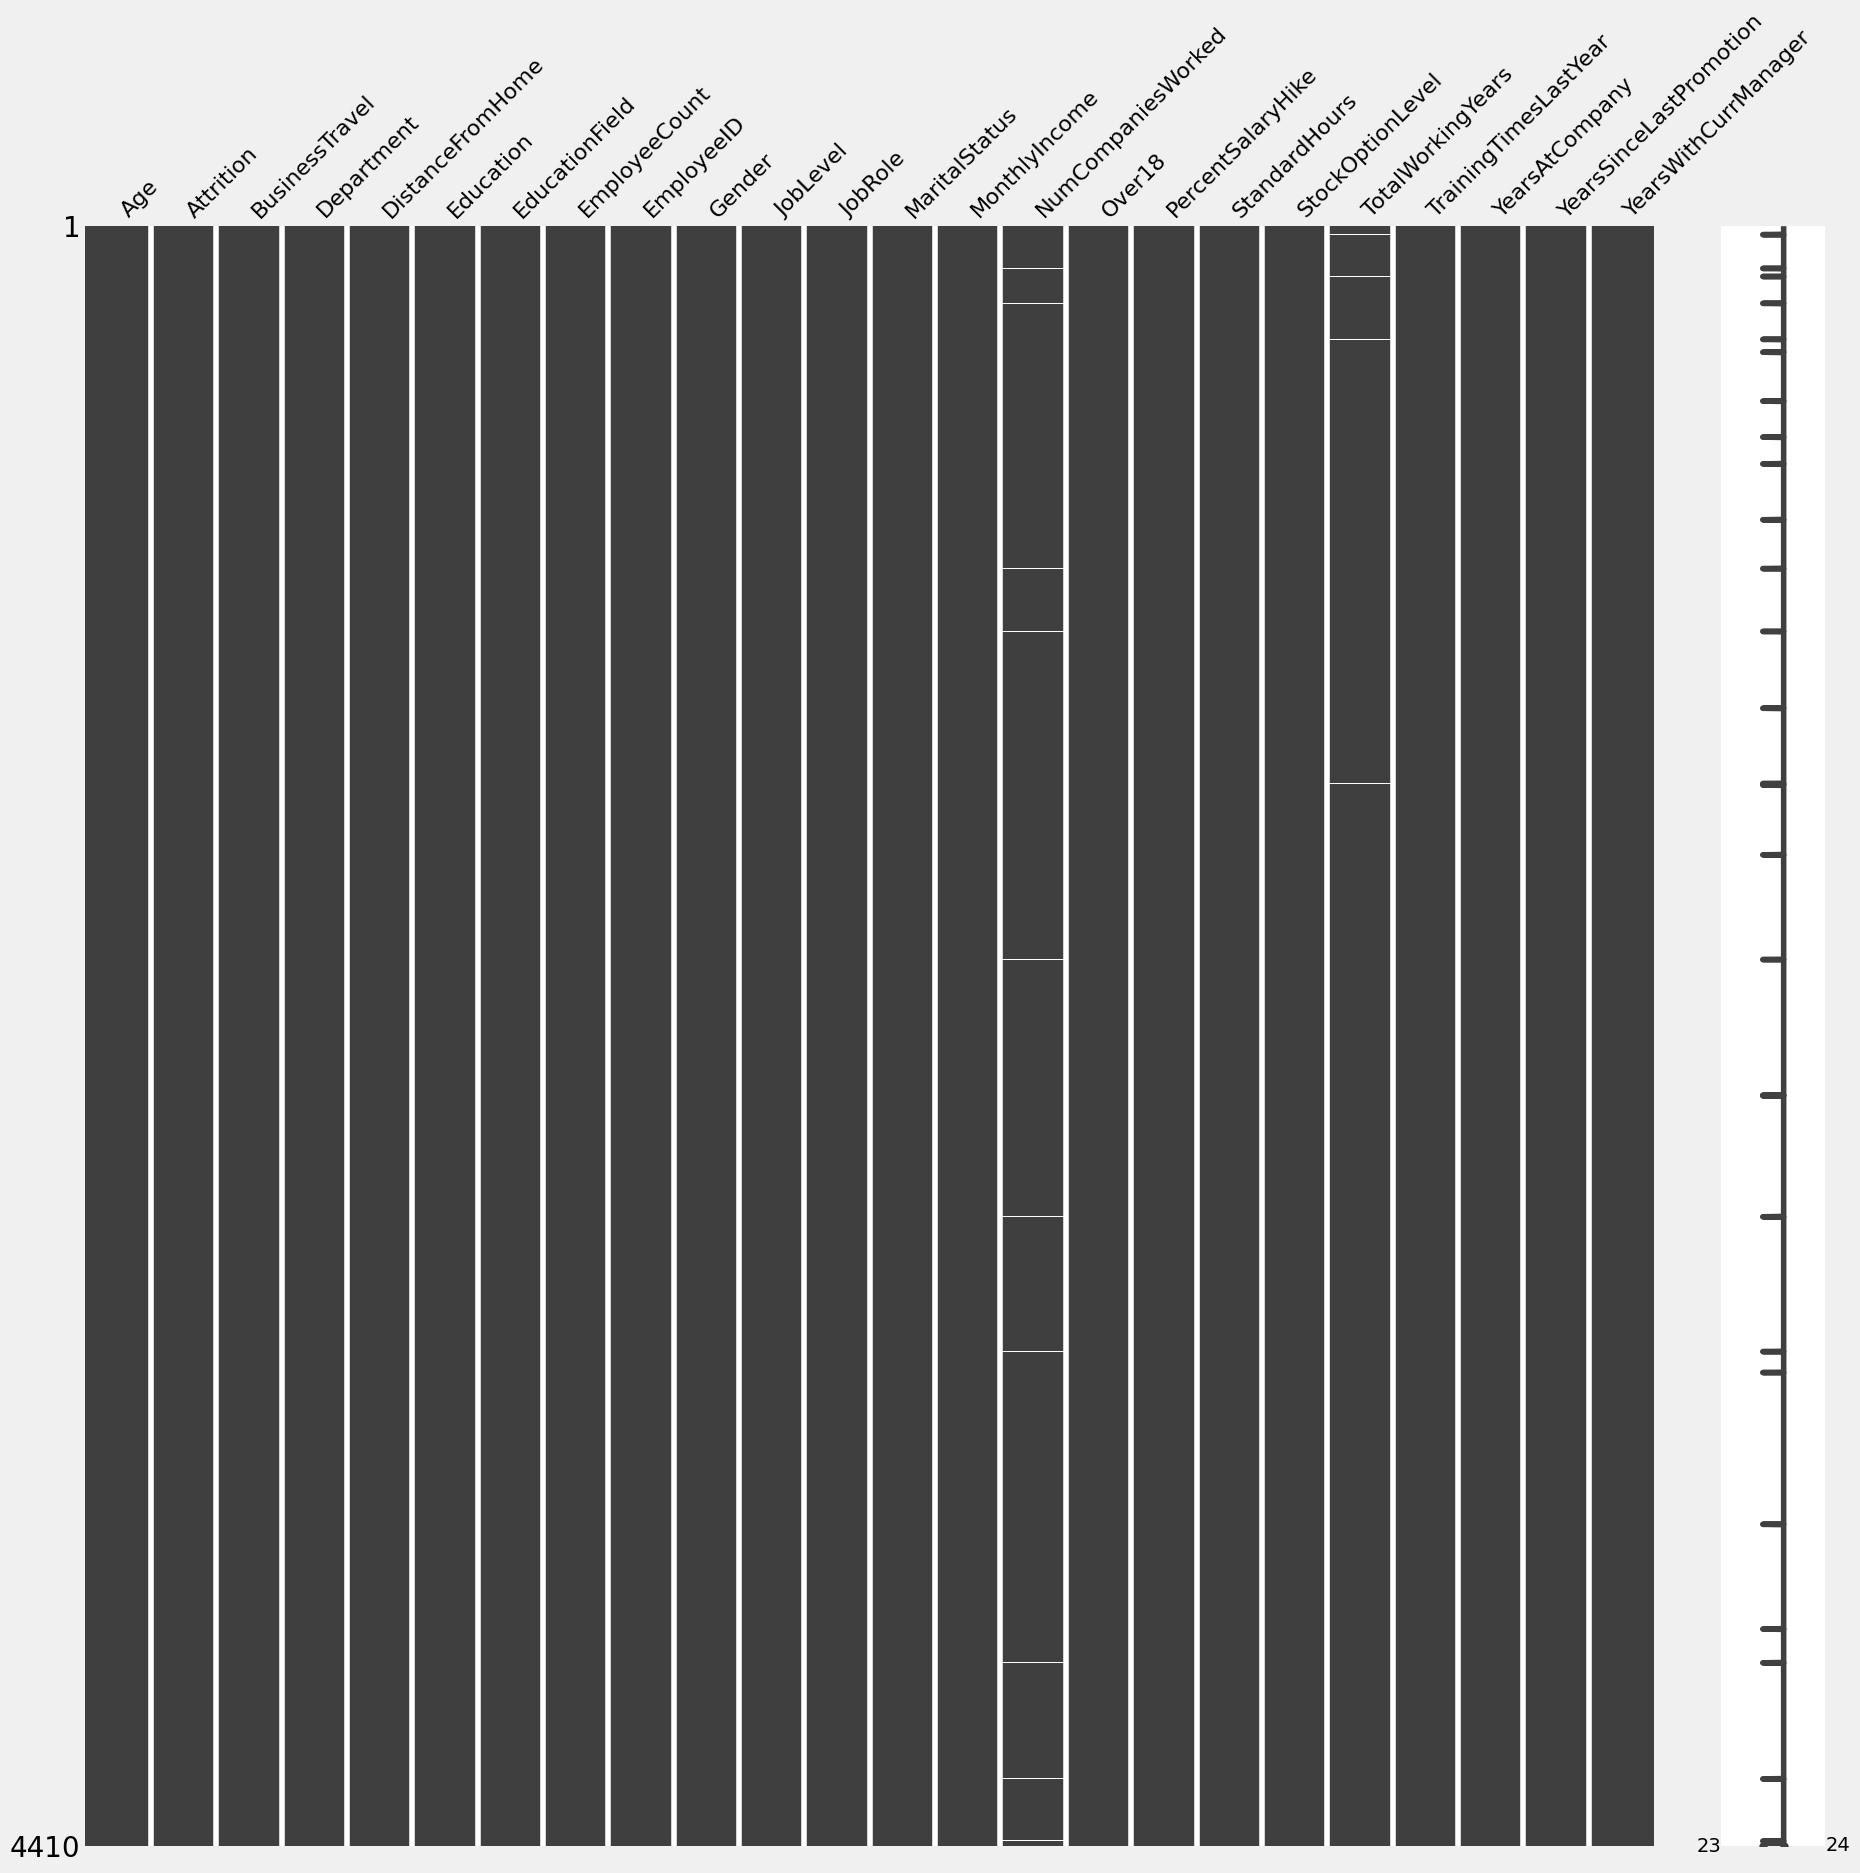

In [ ]:
msno.matrix(df, figsize=(20, 20))

In [ ]:
# df.isnull().any(axis=1)

df[df.isnull().any(axis=1)]

Age Attrition     BusinessTravel              Department  \
23     42        No      Travel_Rarely  Research & Development   
115    27        No      Travel_Rarely                   Sales   
137    43        No  Travel_Frequently                   Sales   
210    52        No      Travel_Rarely                   Sales   
308    47       Yes  Travel_Frequently  Research & Development   
343    40        No  Travel_Frequently                   Sales   
476    22        No      Travel_Rarely  Research & Development   
574    37        No      Travel_Rarely  Research & Development   
647    29        No      Travel_Rarely  Research & Development   
799    29       Yes  Travel_Frequently  Research & Development   
932    32        No      Travel_Rarely  Research & Development   
1103   26        No  Travel_Frequently                   Sales   
1312   37       Yes      Travel_Rarely         Human Resources   
1517   36        No         Non-Travel  Research & Development   
1521   31        No      Travel_Rarely  Research & Development   
1711   33        No      Travel_Rarely                   Sales   
1996   38        No      Travel_Rarely  Research & Development   
2365   18       Yes  Travel_Frequently  Research & Development   
2367   39        No      Travel_Rarely                   Sales   
2696   28       Yes      Travel_Rarely  Research & Development   
3063   30        No      Travel_Rarely  Research & Development   
3120   35        No      Travel_Rarely  Research & Development   
3533   56        No      Travel_Rarely  Research & Development   
3818   28       Yes      Travel_Rarely         Human Resources   
3910   41        No         Non-Travel                   Sales   
4226   36        No      Travel_Rarely  Research & Development   
4395   40        No      Travel_Rarely  Research & Development   
4409   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
23                   4          4     Life Sciences              1   
115                  2          3     Life Sciences              1   
137                 14          3     Life Sciences              1   
210                  2          1           Medical              1   
308                  4          3     Life Sciences              1   
343                  9          3         Marketing              1   
476                  8          3             Other              1   
574                 23          3     Life Sciences              1   
647                  3          3  Technical Degree              1   
799                 28          3           Medical              1   
932                  5          4  Technical Degree              1   
1103                16          2     Life Sciences              1   
1312                 9          3   Human Resources              1   
1517                 5          4     Life Sciences              1   
1521                20          1  Technical Degree              1   
1711                13          4         Marketing              1   
1996                 5          3  Technical Degree              1   
2365                 3          5           Medical              1   
2367                 2          4     Life Sciences              1   
2696                 1          4     Life Sciences              1   
3063                 3          3     Life Sciences              1   
3120                12          2           Medical              1   
3533                 3          2             Other              1   
3818                 1          3           Medical              1   
3910                 2          2           Medical              1   
4226                 2          3     Life Sciences              1   
4395                 2          3     Life Sciences              1   
4409                28          3           Medical              1   

      EmployeeID  Gender  ...  NumCompaniesWorked Over18 Per

In [ ]:
df['JobRole'].value_counts()

Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: JobRole, dtype: int64

In [ ]:
df.pivot_table(values='EmployeeCount', index=['Department', 'JobRole'], columns='Attrition', aggfunc=np.sum, fill_value=0)

Attrition                                          No  Yes
Department             JobRole                            
Human Resources        Healthcare Representative    6    3
                       Human Resources              3    0
                       Laboratory Technician       21   18
                       Manager                      6    3
                       Manufacturing Director      18    6
                       Research Director            3    0
                       Research Scientist          33    3
                       Sales Executive             30   24
                       Sales Representative        12    0
Research & Development Healthcare Representative  240   21
                       Human Resources             90   18
                       Laboratory Technician      420   72
                       Manager                    183   24
                       Manufacturing Director     249   36
                       Research Director          114   42
                       Research Scientist         465   99
                       Sales Executive            519  111
                       Sales Representative       150   30
Sales                  Healthcare Representative   90   33
                       Human Resources             42    3
                       Laboratory Technician      210   36
                       Manager                     75   15
                       Manufacturing Director     120    6
                       Research Director           66   15
                       Research Scientist         219   57
                       Sales Executive            264   30
                       Sales Representative        51    6

In [ ]:
# df['D'] = df['NumCompaniesWorked'].isnull()
# df['D'] = df.groupby(['Department', 'JobRole'])['D'].transform('sum').astype(int)

# print(df.pivot_table(values='EmployeeCount', index=['Department', 'JobRole'], columns='D', aggfunc=np.sum))

In [ ]:
# df.groupby('JobRole').count().rsub(df.groupby('JobRole').size(), axis=0)

In [ ]:
df.pivot_table(index=['Department', 'JobRole', 'JobLevel'],
               values=['NumCompaniesWorked','TotalWorkingYears'],
               aggfunc= lambda x: x.isna().sum())

NumCompaniesWorked  \
Department             JobRole                   JobLevel                       
Human Resources        Healthcare Representative 1                          0   
                                                 2                          1   
                                                 5                          0   
                       Human Resources           1                          0   
                       Laboratory Technician     1                          0   
                                                 2                          0   
                                                 3                          0   
                                                 4                          0   
                                                 5                          0   
                       Manager                   1                          0   
                                                 2                          0   
                                                 5                          0   
                       Manufacturing Director    1                          0   
                                                 2                          0   
                                                 3                          0   
                                                 4                          0   
                       Research Director         2                          0   
                       Research Scientist        1                          0   
                                                 2                          0   
                                                 3                          0   
                       Sales Executive           1                          0   
                                                 2                          0   
                                                 3                          0   
                                                 4                          0   
                                                 5                          0   
                       Sales Representative      1                          0   
                                                 2                          0   
                                                 3                          0   
Research & Development Healthcare Representative 1                          0   
                                                 2                          2   
                                                 3                          0   
                                                 4                          0   
                                                 5                          0   
                       Human Resources           1                          0   
                                                 2                          0   
                                                 3                          0   
                                                 4                          0   
                                                 5                          0   
                       Laboratory Technician     1                          0   
                                                 2                          0   
                                                 3                          0   
                                                 4                          0   
                                                 5                          0   
                       Manager                   1                          0   
                                                 2                          1   
                                                 3                          0   
                                                 4                          0   
                                                 5                          0   
         

 Numeric: Age, DistanceFromHome, Education, EmployeeCount, *EmployeeID*, JobLevel, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsSinceLastPromotion, YearsWithCurrManager   


Categoric: *Attrition*, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18

In [ ]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18']

for col in cols_cat:
  print(f'Columna {col}: {df[col].nunique()} subniveles')

# Over18 only has one value

Columna Attrition: 2 subniveles
Columna BusinessTravel: 3 subniveles
Columna Department: 3 subniveles
Columna EducationField: 6 subniveles
Columna Gender: 2 subniveles
Columna JobRole: 9 subniveles
Columna MaritalStatus: 3 subniveles
Columna Over18: 1 subniveles


In [ ]:
df.describe()

# EmployeeCount and StandardHours have the same value in STD so they have the same value in all rows

Age  DistanceFromHome    Education  EmployeeCount   EmployeeID  \
count  4410.000000       4410.000000  4410.000000         4410.0  4410.000000   
mean     36.923810          9.192517     2.912925            1.0  2205.500000   
std       9.133301          8.105026     1.023933            0.0  1273.201673   
min      18.000000          1.000000     1.000000            1.0     1.000000   
25%      30.000000          2.000000     2.000000            1.0  1103.250000   
50%      36.000000          7.000000     3.000000            1.0  2205.500000   
75%      43.000000         14.000000     4.000000            1.0  3307.750000   
max      60.000000         29.000000     5.000000            1.0  4410.000000   

          JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count  4410.000000    4410.000000         4391.000000        4410.000000   
mean      2.063946   65029.312925            2.694830          15.209524   
std       1.106689   47068.888559            2.498887           3.659108   
min       1.000000   10090.000000            0.000000          11.000000   
25%       1.000000   29110.000000            1.000000          12.000000   
50%       2.000000   49190.000000            2.000000          14.000000   
75%       3.000000   83800.000000            4.000000          18.000000   
max       5.000000  199990.000000            9.000000          25.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         4410.0       4410.000000        4401.000000   
mean             8.0          0.793878          11.279936   
std              0.0          0.851883           7.782222   
min              8.0          0.000000           0.000000   
25%              8.0          0.000000           6.000000   
50%              8.0          1.000000          10.000000   
75%              8.0          1.000000          15.000000   
max              8.0          3.000000          40.000000   

       TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
count            4410.000000     4410.000000              4410.000000   
mean                2.799320        7.008163                 2.187755   
std                 1.288978        6.125135                 3.221699   
min                 0.000000        0.000000                 0.000000   
25%                 2.000000        3.000000                 0.000000   
50%                 3.000000        5.000000                 1.000000   
75%                 3.000000        9.000000                 3.000000   
max                 6.000000       40.000000                15.000000   

       YearsWithCurrManager  
count           4410.000000  
mean               4.123129  
std                3.567327  
min                0.000000  
25%                2.000000  
50%                3.000000  
75%                7.000000  
max               17.000000

# Transforming null and duplicate data

In [ ]:
# Imputing with KNNImputer

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

df_knn = df.filter(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], axis=1).copy()

scaler = MinMaxScaler(feature_range=(0, 1))
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

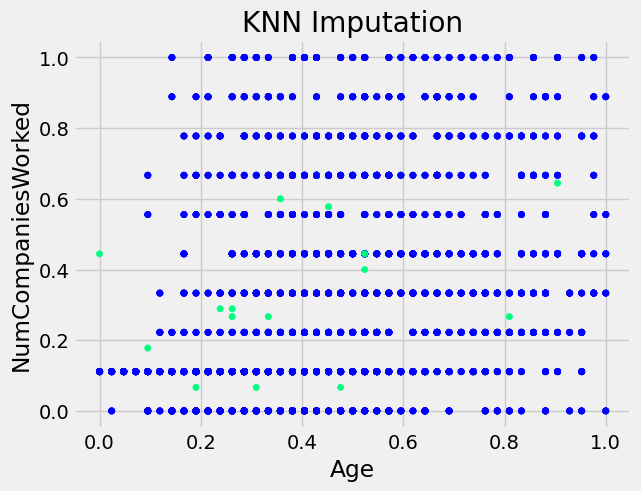

In [ ]:
# First variable with missing data
fig = plt.Figure()
null_values = df['NumCompaniesWorked'].isnull()
fig = df_knn_imputed.plot(x='Age', y='NumCompaniesWorked', kind='scatter', c=null_values, cmap='winter', title='KNN Imputation', colorbar=False)

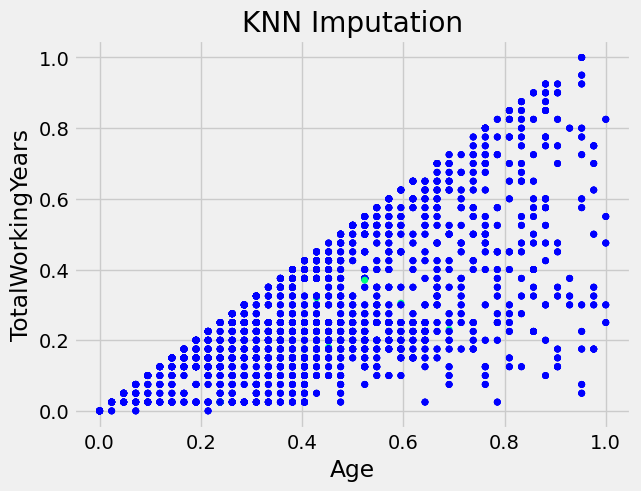

In [ ]:
# Second variable with missing data
fig = plt.Figure()
null_values = df['TotalWorkingYears'].isnull()
fig = df_knn_imputed.plot(x='Age', y='TotalWorkingYears', kind='scatter', c=null_values, cmap='winter', title='KNN Imputation', colorbar=False)

In [ ]:
# 'Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'

In [ ]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

df_mice = df.filter(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], axis=1).copy()

mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)

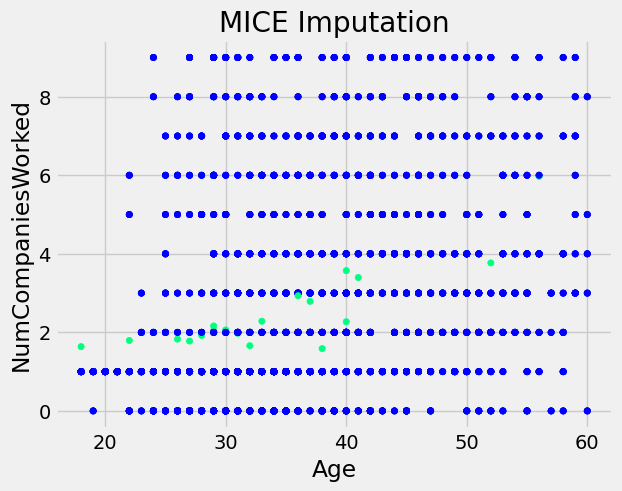

In [ ]:
fig = plt.Figure()
null_values = df['NumCompaniesWorked'].isnull()
fig = df_mice_imputed.plot(x='Age', y='NumCompaniesWorked', kind='scatter', c=null_values, cmap='winter', title='MICE Imputation', colorbar=False)

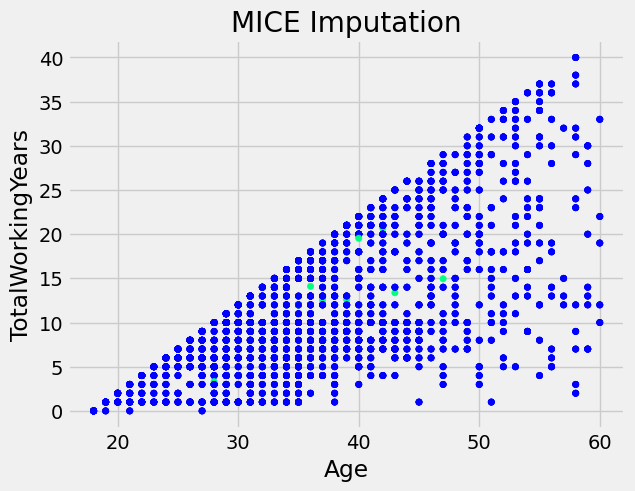

In [ ]:
fig = plt.Figure()
null_values = df['TotalWorkingYears'].isnull()
fig = df_mice_imputed.plot(x='Age', y='TotalWorkingYears', kind='scatter', c=null_values, cmap='winter', title='MICE Imputation', colorbar=False)

In [ ]:
df.duplicated(subset=['EmployeeID']).sum()

# No duplicate EmployeeID

0

In [ ]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {df.shape}')

Tamaño del set antes de eliminar las filas repetidas: (4410, 24)
Tamaño del set después de eliminar las filas repetidas: (4410, 24)


In [ ]:
df_mice_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   float64
 1   DistanceFromHome         4410 non-null   float64
 2   Education                4410 non-null   float64
 3   EmployeeCount            4410 non-null   float64
 4   JobLevel                 4410 non-null   float64
 5   MonthlyIncome            4410 non-null   float64
 6   NumCompaniesWorked       4410 non-null   float64
 7   PercentSalaryHike        4410 non-null   float64
 8   StandardHours            4410 non-null   float64
 9   StockOptionLevel         4410 non-null   float64
 10  TotalWorkingYears        4410 non-null   float64
 11  TrainingTimesLastYear    4410 non-null   float64
 12  YearsAtCompany           4410 non-null   float64
 13  YearsSinceLastPromotion  4410 non-null   float64
 14  YearsWithCurrManager    

In [ ]:
cols_to_use = df.columns.difference(df_mice_imputed.columns)

In [ ]:
dfNew = pd.merge(df_mice_imputed, df[cols_to_use], left_index=True, right_index=True, how='outer')

In [ ]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   float64
 1   DistanceFromHome         4410 non-null   float64
 2   Education                4410 non-null   float64
 3   EmployeeCount            4410 non-null   float64
 4   JobLevel                 4410 non-null   float64
 5   MonthlyIncome            4410 non-null   float64
 6   NumCompaniesWorked       4410 non-null   float64
 7   PercentSalaryHike        4410 non-null   float64
 8   StandardHours            4410 non-null   float64
 9   StockOptionLevel         4410 non-null   float64
 10  TotalWorkingYears        4410 non-null   float64
 11  TrainingTimesLastYear    4410 non-null   float64
 12  YearsAtCompany           4410 non-null   float64
 13  YearsSinceLastPromotion  4410 non-null   float64
 14  YearsWithCurrManager    

# Correlation


In [ ]:
dfNew.corr()

Age  DistanceFromHome  Education  EmployeeCount  \
Age                      1.000000          0.006963  -0.035706            NaN   
DistanceFromHome         0.006963          1.000000  -0.008638            NaN   
Education               -0.035706         -0.008638   1.000000            NaN   
EmployeeCount                 NaN               NaN        NaN            NaN   
JobLevel                -0.002884         -0.037329   0.045746            NaN   
MonthlyIncome           -0.044314         -0.021607   0.006410            NaN   
NumCompaniesWorked       0.300055         -0.014034  -0.016966            NaN   
PercentSalaryHike       -0.033137          0.038125  -0.040531            NaN   
StandardHours                 NaN               NaN        NaN            NaN   
StockOptionLevel        -0.031753          0.011169   0.001261            NaN   
TotalWorkingYears        0.680716          0.009936  -0.010288            NaN   
TrainingTimesLastYear   -0.027308         -0.009001   0.010472            NaN   
YearsAtCompany           0.311309          0.031684   0.006080            NaN   
YearsSinceLastPromotion  0.216513          0.002290   0.022490            NaN   
YearsWithCurrManager     0.202089          0.021584   0.005358            NaN   
EmployeeID               0.008649         -0.001097  -0.009680            NaN   

                         JobLevel  MonthlyIncome  NumCompaniesWorked  \
Age                     -0.002884      -0.044314            0.300055   
DistanceFromHome        -0.037329      -0.021607           -0.014034   
Education                0.045746       0.006410           -0.016966   
EmployeeCount                 NaN            NaN                 NaN   
JobLevel                 1.000000       0.047316           -0.010185   
MonthlyIncome            0.047316       1.000000           -0.020606   
NumCompaniesWorked      -0.010185      -0.020606            1.000000   
PercentSalaryHike        0.010973       0.004325            0.030942   
StandardHours                 NaN            NaN                 NaN   
StockOptionLevel         0.000993       0.026930            0.016994   
TotalWorkingYears       -0.037429      -0.033467            0.239041   
TrainingTimesLastYear   -0.032500       0.050112           -0.032036   
YearsAtCompany          -0.064219       0.000995           -0.117893   
YearsSinceLastPromotion -0.060811       0.065219           -0.036135   
YearsWithCurrManager    -0.055251       0.024304           -0.109597   
EmployeeID              -0.003303       0.007338           -0.000501   

                         PercentSalaryHike  StandardHours  StockOptionLevel  \
Age                              -0.033137            NaN         -0.031753   
DistanceFromHome                  0.038125            NaN          0.011169   
Education                        -0.040531            NaN          0.001261   
EmployeeCount                          NaN            NaN               NaN   
JobLevel                          0.010973            NaN          0.000993   
MonthlyIncome                     0.004325            NaN          0.026930   
NumCompaniesWorked                0.030942            NaN          0.016994   
PercentSalaryHike                 1.000000            NaN          0.012548   
StandardHours                          NaN            NaN               NaN   
StockOptionLevel                  0.012548            NaN          1.000000   
TotalWorkingYears                -0.018945            NaN          0.002169   
TrainingTimesLastYear            -0.037392            NaN         -0.069902   
YearsAtCompany                   -0.029707            NaN          0.007886   
YearsSinceLastPromotion          -0.029542            NaN          0.019063   
YearsWithCurrManager             -0.040864            NaN          0.017757   
EmployeeID                       -0.004456            NaN         -0.014254   

                         TotalWorkingYears  TrainingTimesLastYear  \
Age           

In [ ]:
pd.set_option('display.max_rows',1000)
dfNew.corr().unstack().sort_values().drop_duplicates()

YearsAtCompany           NumCompaniesWorked        -0.117893
NumCompaniesWorked       YearsWithCurrManager      -0.109597
StockOptionLevel         TrainingTimesLastYear     -0.069902
JobLevel                 YearsAtCompany            -0.064219
                         YearsSinceLastPromotion   -0.060811
YearsWithCurrManager     JobLevel                  -0.055251
MonthlyIncome            Age                       -0.044314
PercentSalaryHike        YearsWithCurrManager      -0.040864
Education                PercentSalaryHike         -0.040531
TotalWorkingYears        TrainingTimesLastYear     -0.039638
JobLevel                 TotalWorkingYears         -0.037429
TrainingTimesLastYear    PercentSalaryHike         -0.037392
JobLevel                 DistanceFromHome          -0.037329
YearsSinceLastPromotion  NumCompaniesWorked        -0.036135
Age                      Education                 -0.035706
TotalWorkingYears        MonthlyIncome             -0.033467
PercentSalaryHike       

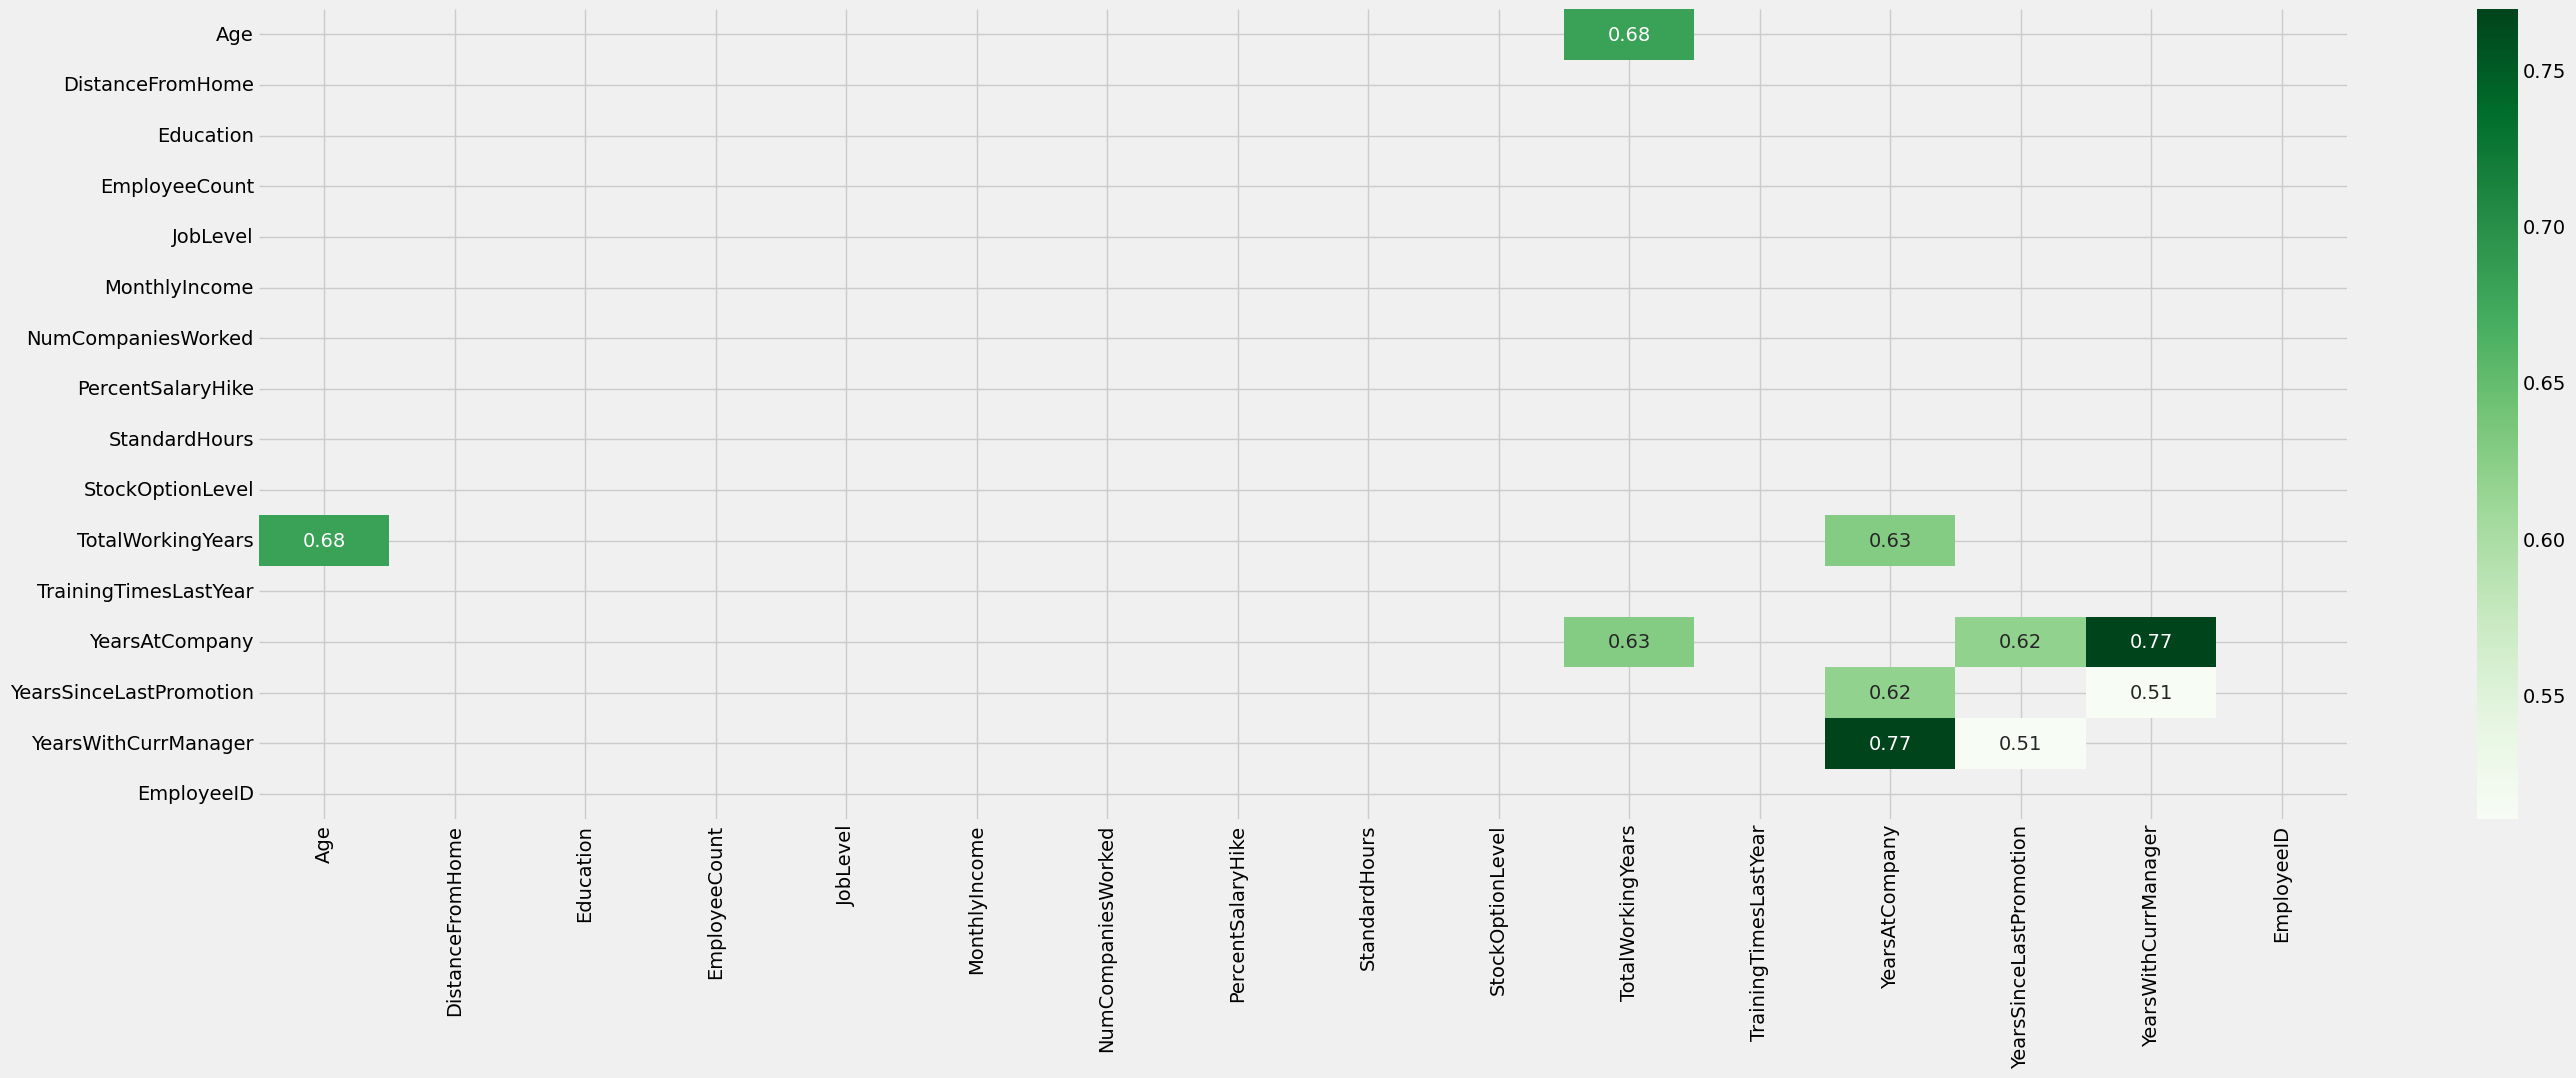

In [ ]:
dfCorr = dfNew.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Greens")
plt.show()

# Outliers and discrepancies

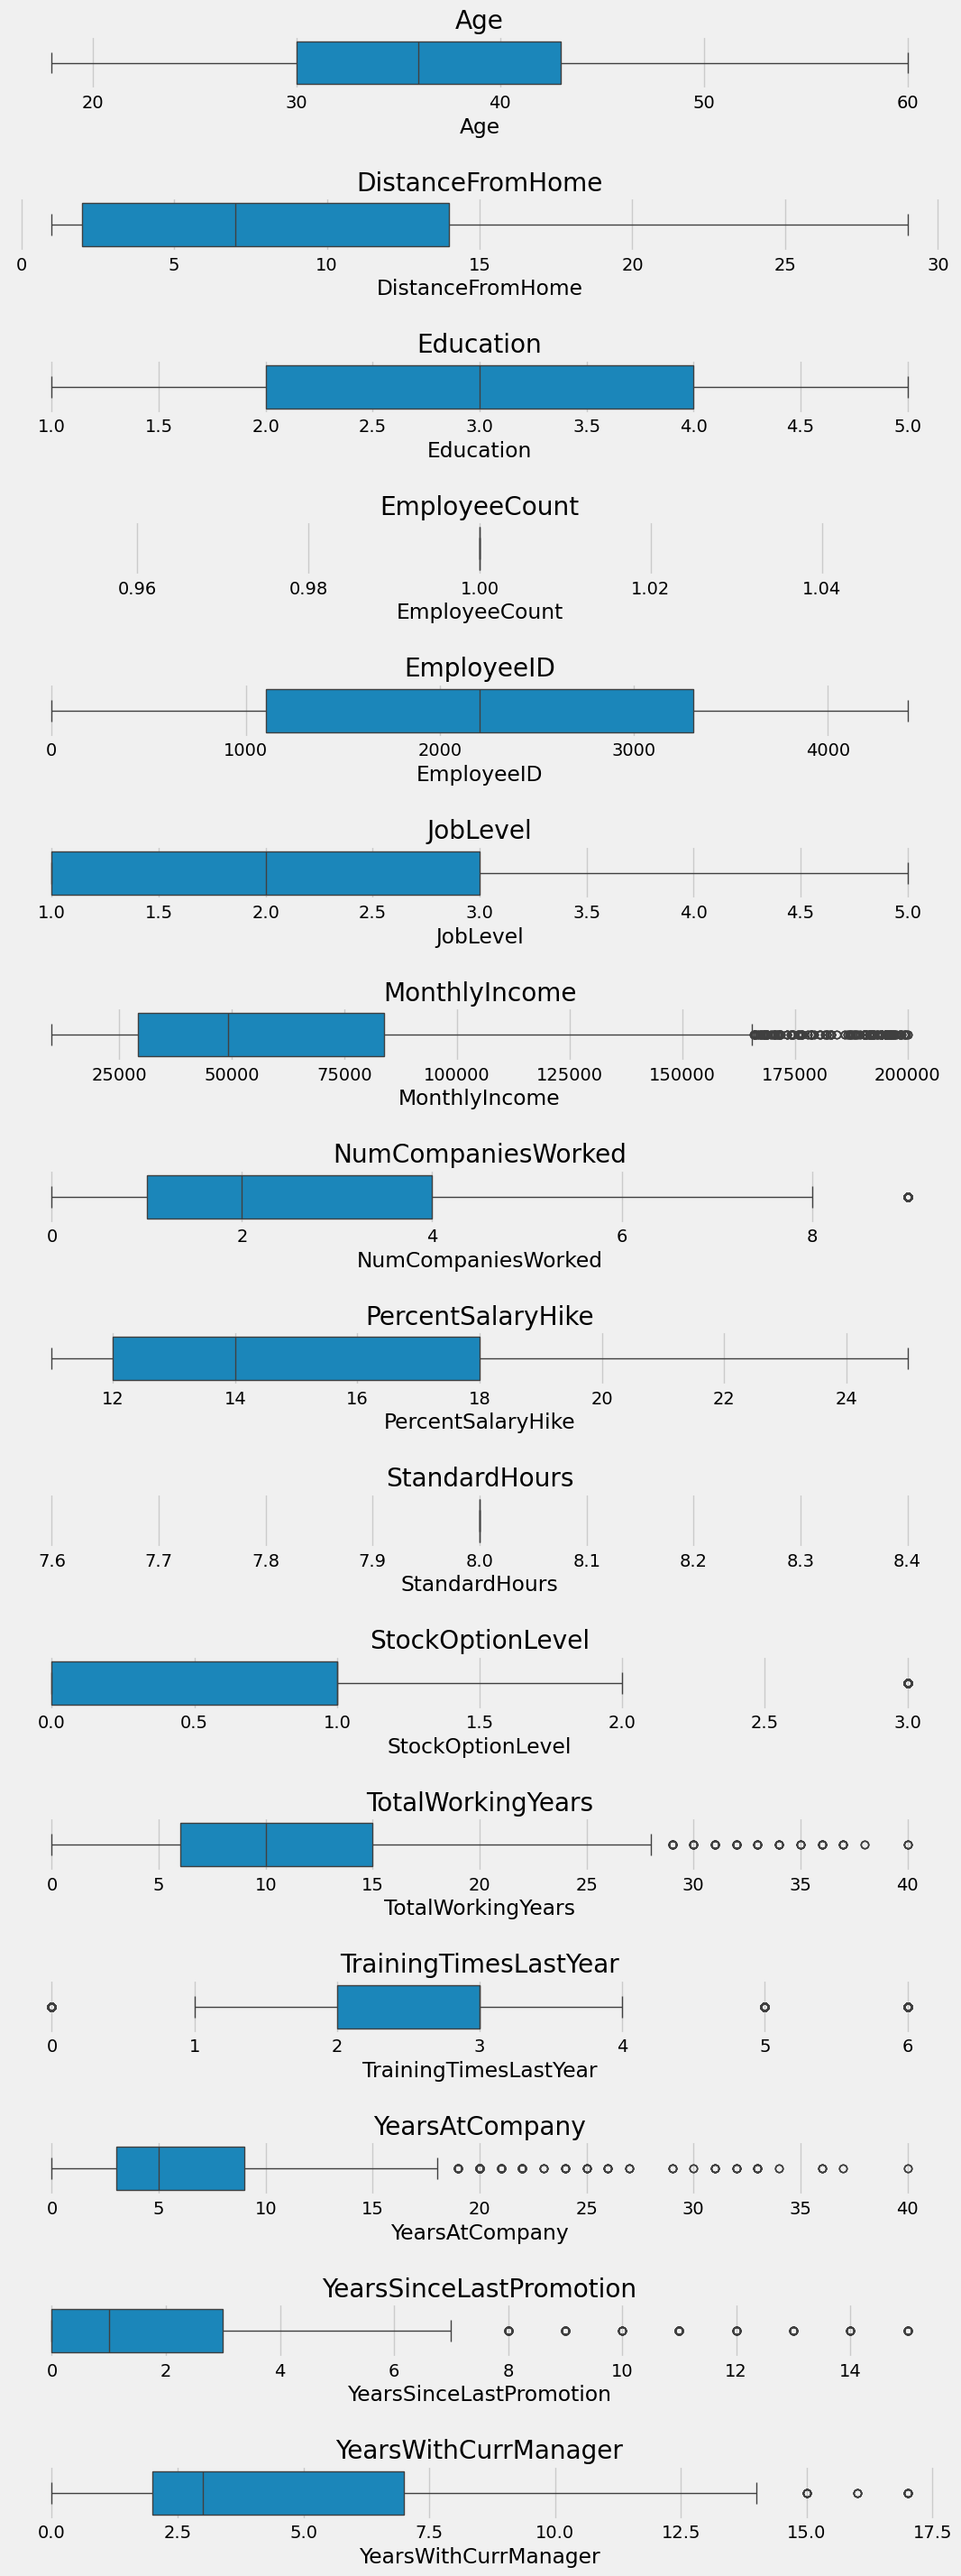

In [ ]:
# Boxplot for numeric columns
cols_num = ['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
            'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

fig, ax = plt.subplots(nrows=len(cols_num), ncols=1, figsize=(12,34))
fig.subplots_adjust(hspace=2)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=dfNew, ax=ax[i])
    ax[i].set_title(col)

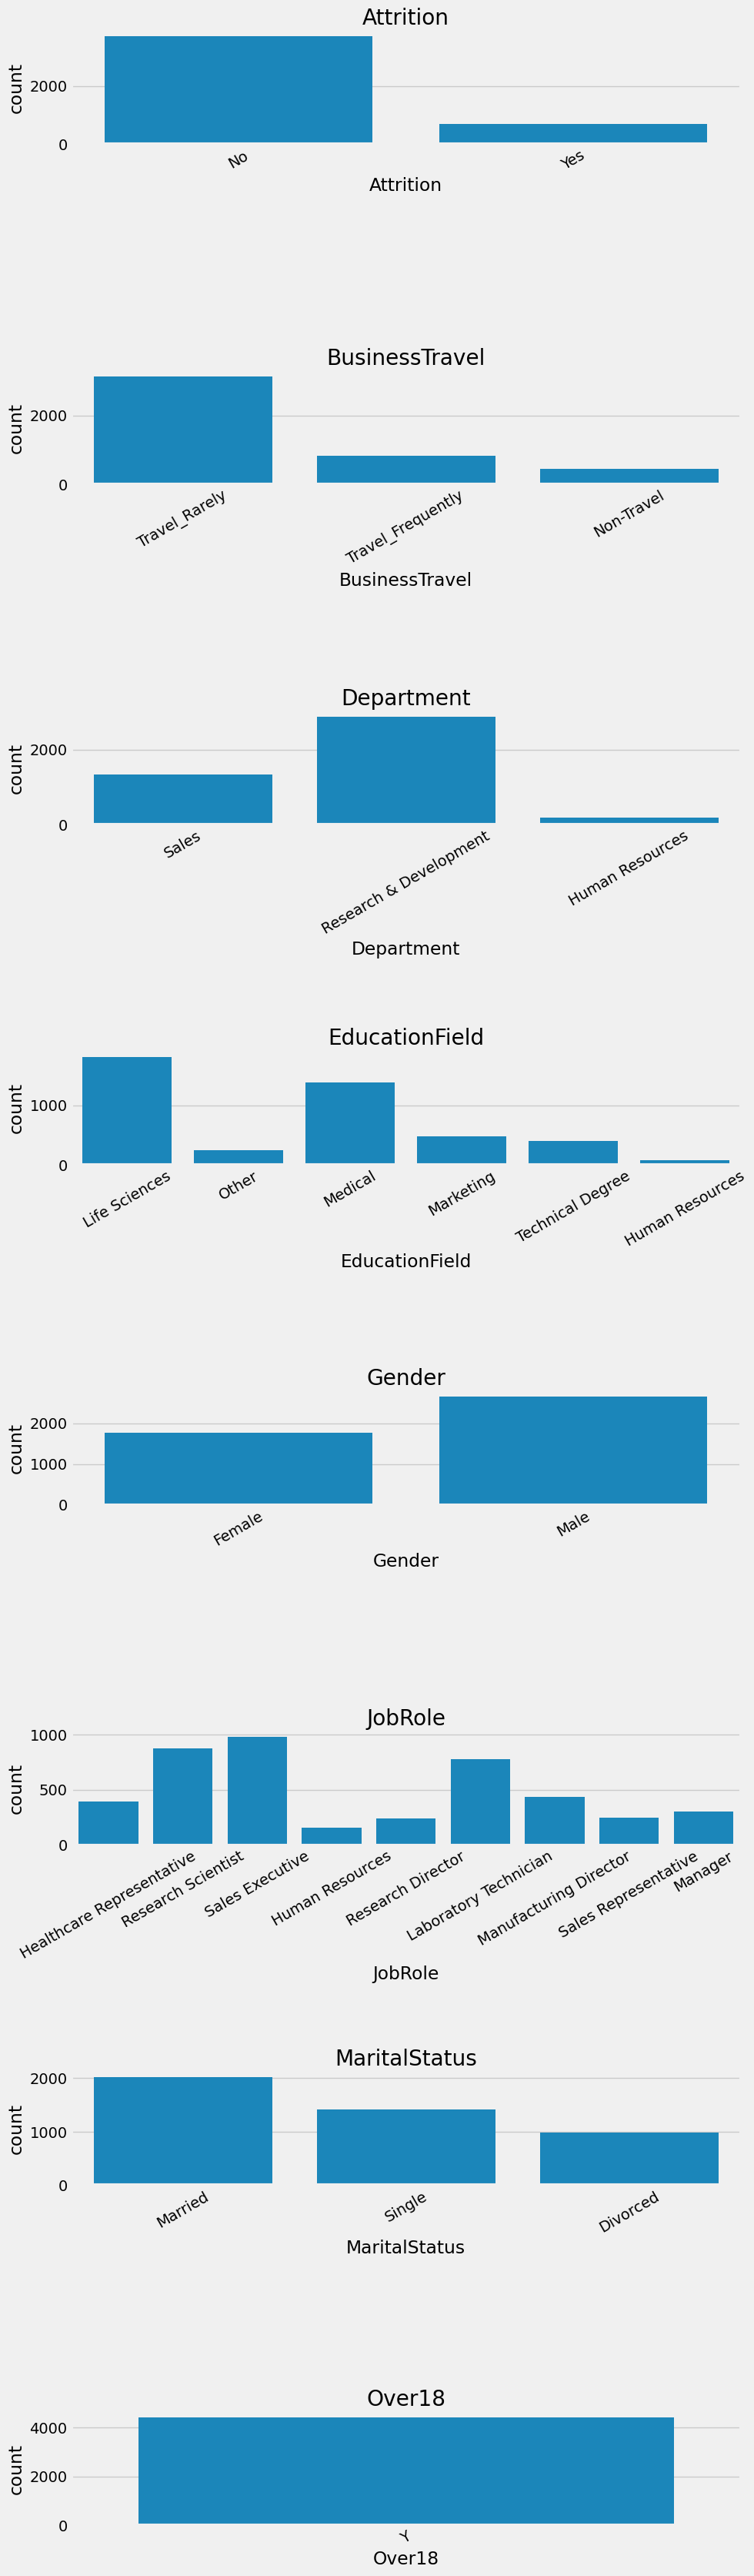

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Check categoric columns
cols_cat = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18']

fig, ax = plt.subplots(ncols=1, nrows=len(cols_cat), figsize=(10,40))
fig.subplots_adjust(hspace=2)

for i, col in enumerate(cols_cat):
       sns.countplot(x = cols_cat[i], data=dfNew, ax=ax[i])
       ax[i].set_title(col)
       ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

# Relevant variables

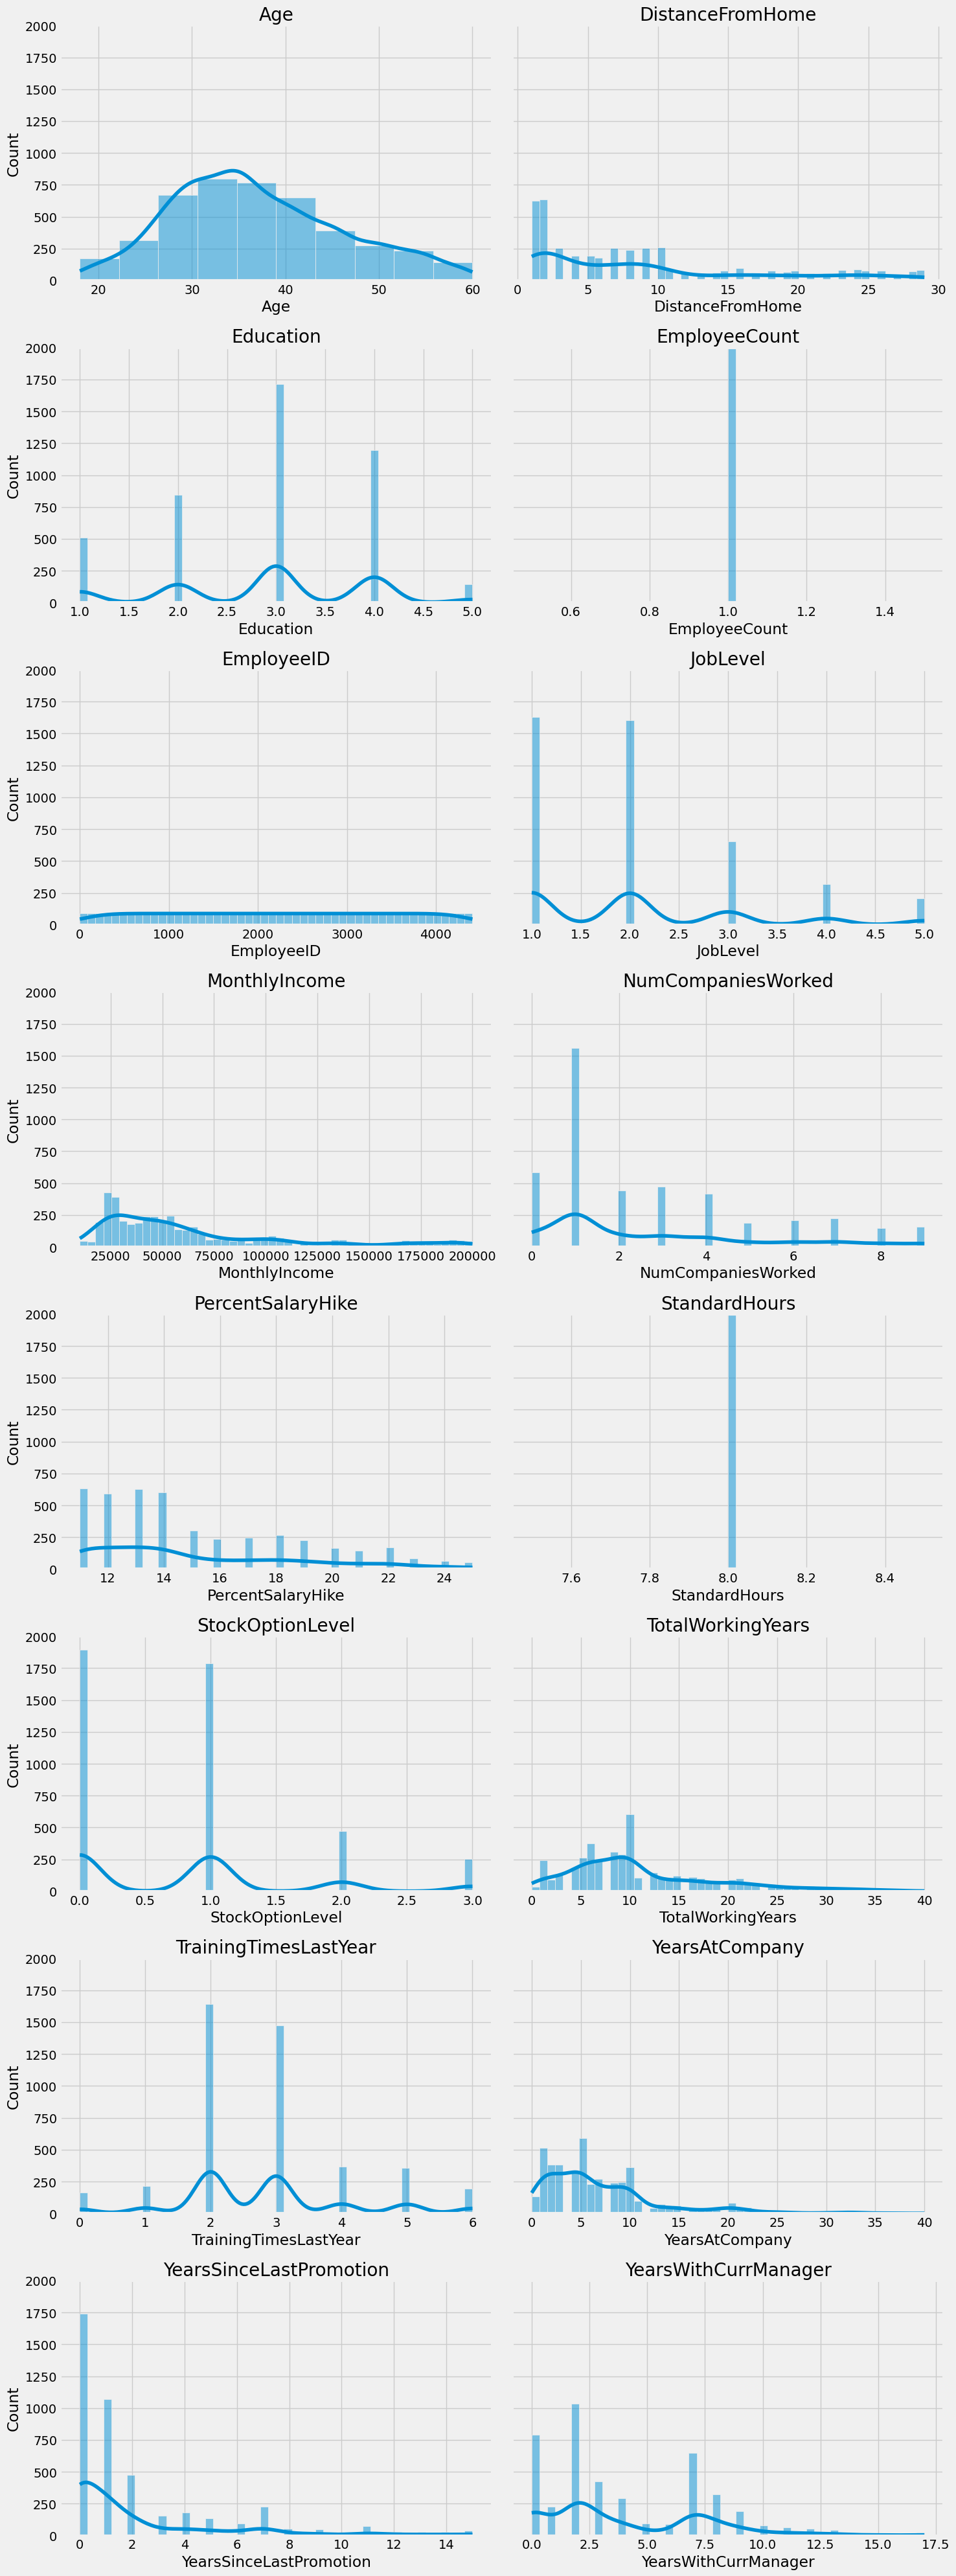

In [ ]:
cols_num = ['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
            'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

rows = len(cols_num) // 2 + len(cols_num) % 2

fig, ax = plt.subplots(nrows=rows, ncols=2, figsize=(15, 5 * rows), sharey=True)
fig.subplots_adjust(hspace=0.5)


for i, col in enumerate(cols_num):
    row, col_index = divmod(i, 2)
    if col == 'Age':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=dfNew, ax=ax[row, col_index], bins=nbins, kde = True)
    ax[row, col_index].set_title(col)

    ax[row, col_index].set_ylim(0, 2000)

plt.tight_layout()
plt.show()

In [ ]:
dfNew['YearsSinceLastPromotion'].describe()

count    4410.000000
mean        2.187755
std         3.221699
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

In [ ]:
# 'yes' = 1, 'no' = 0
dic = {'Yes':1, 'No':0}
binary = dfNew['Attrition'].map(dic)
dfNew['Attrition_bin'] = binary

# Tasa de abandono es el promedio de la columna 'Attrition_bin'

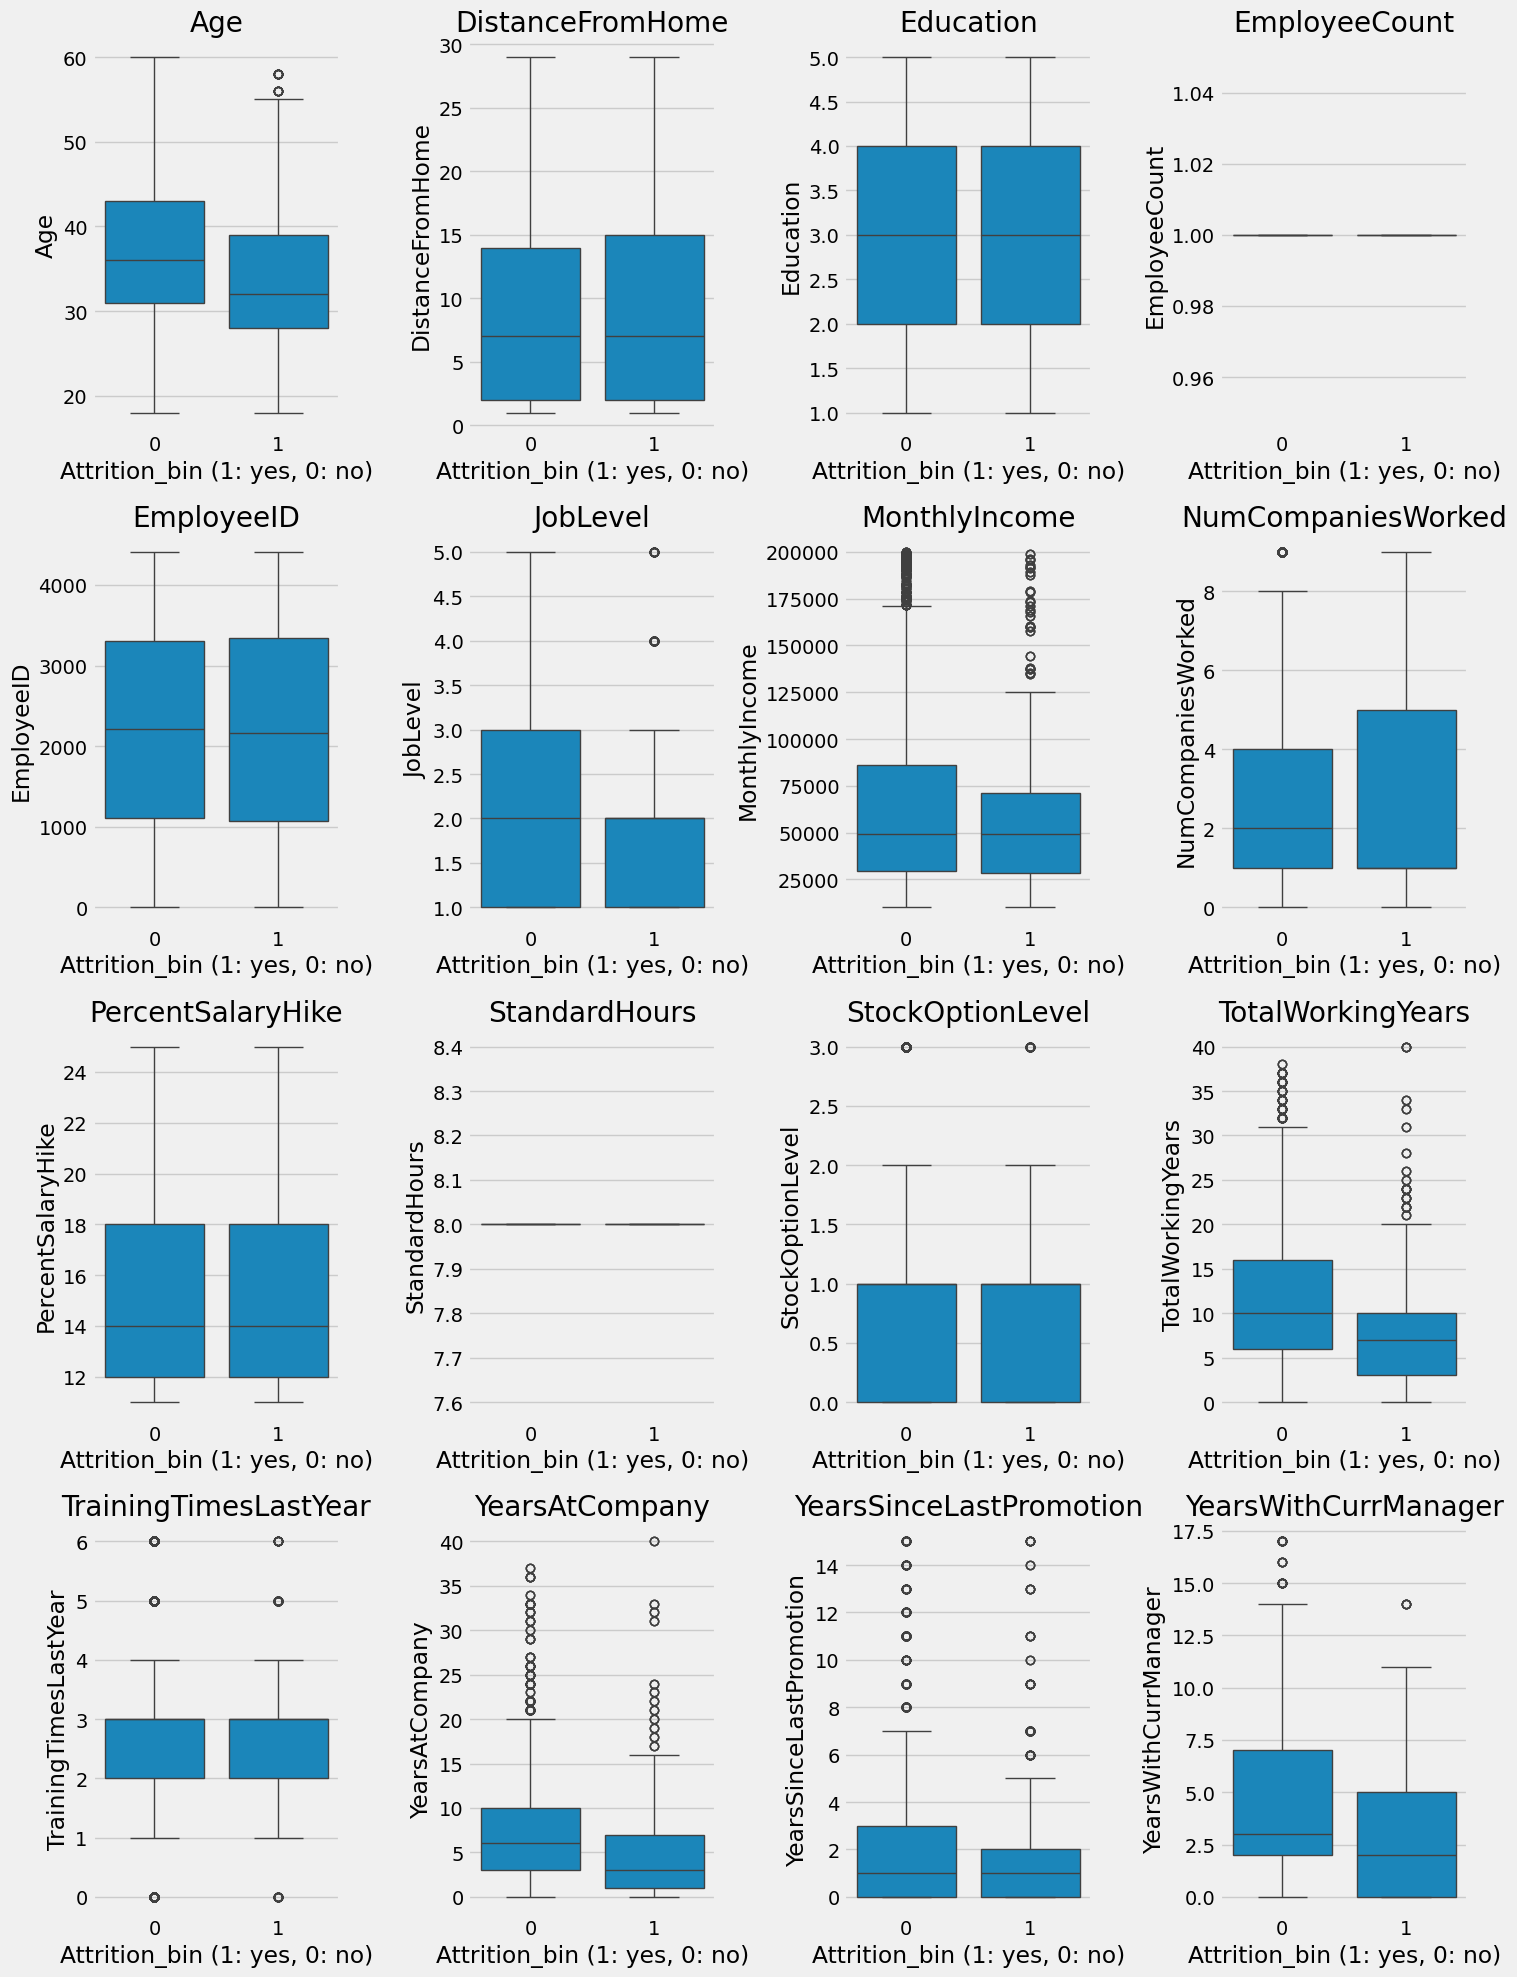

In [ ]:
# Analizar la relación entre las variables numéricas y la variable a predecir ('Attrition')
nrows = len(cols_num) // 4 + len(cols_num) % 4
ncols = 4

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
fig.subplots_adjust(hspace=.25)

for i, col in enumerate(cols_num):
  row, col_index = divmod(i, ncols)
  bplt = sns.boxplot(x='Attrition_bin', y=col, data=dfNew, ax=ax[row, col_index])
  ax[row, col_index].set_xlabel('Attrition_bin (1: yes, 0: no)')
  ax[row, col_index].set_title(col)

plt.tight_layout()
plt.show()

In [ ]:
# Graficar tasas de abandono

def graficar_tasas_abandono(var_predictora, var_predecir, type='line', order=None):
    x, y = var_predictora, var_predecir

    # Generar agrupaciones (groupby), calcular tasa de abandono (mean),
    # multiplicarla por 100 (mul(100))
    grupo = dfNew.groupby(x)[y].mean().mul(100).rename('tasa_a').reset_index()

    # Y generar gráfica
    if type=='line': # Útil para rangos continuos
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictora, y='tasa_a', data=grupo)
        plt.grid(True)
    elif type=='bar': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(14,6))
        sns.barplot(x=var_predictora, y='tasa_a', data=grupo, order=order)
        plt.grid(True)
    elif type=='scatter': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(10,6))
        sns.scatterplot(x=var_predictora, y='tasa_a', data=grupo)
        plt.grid(True)

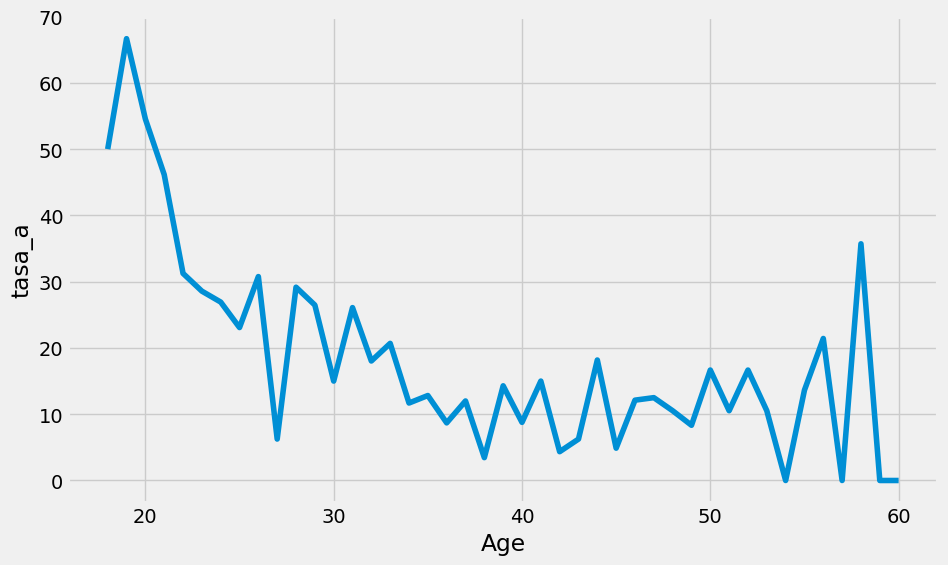

In [ ]:
graficar_tasas_abandono('Age','Attrition_bin')

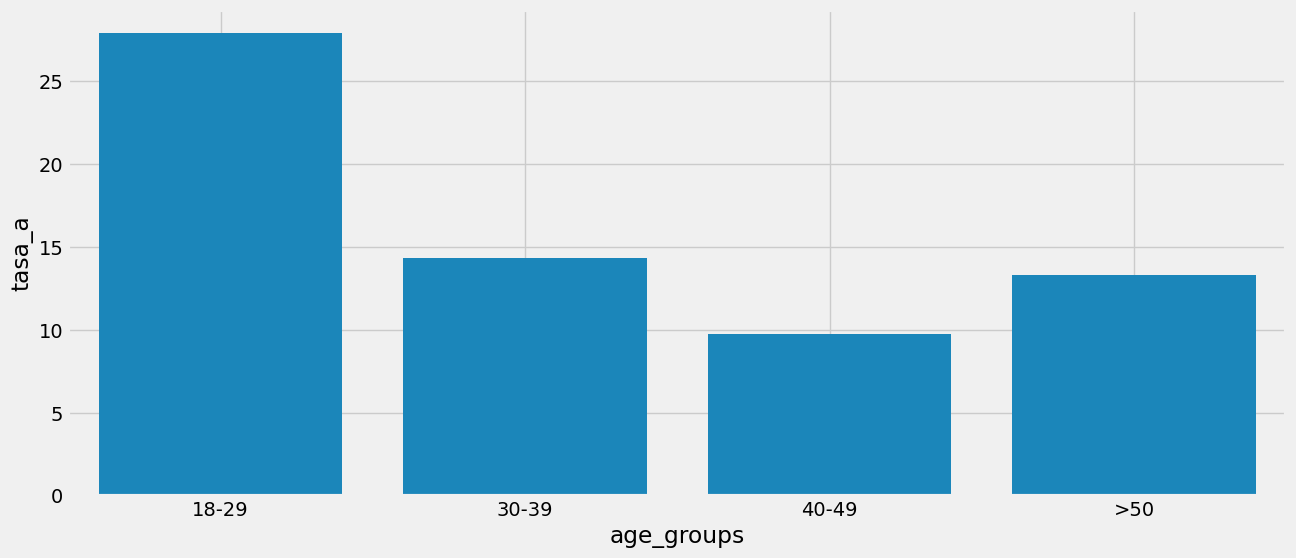

In [ ]:
# Grupos de edades

dfNew.loc[:,'age_groups'] = '18-29'
dfNew.loc[dfNew['Age']>=50,'age_groups'] = '>50'
dfNew.loc[(dfNew['Age']>=30)&(dfNew['Age']<=39), 'age_groups'] = '30-39'
dfNew.loc[(dfNew['Age']>=40)&(dfNew['Age']<=49), 'age_groups'] = '40-49'

graficar_tasas_abandono('age_groups','Attrition_bin',type='bar')

# 18-29
# 30-39
# 40-49
# 50-60

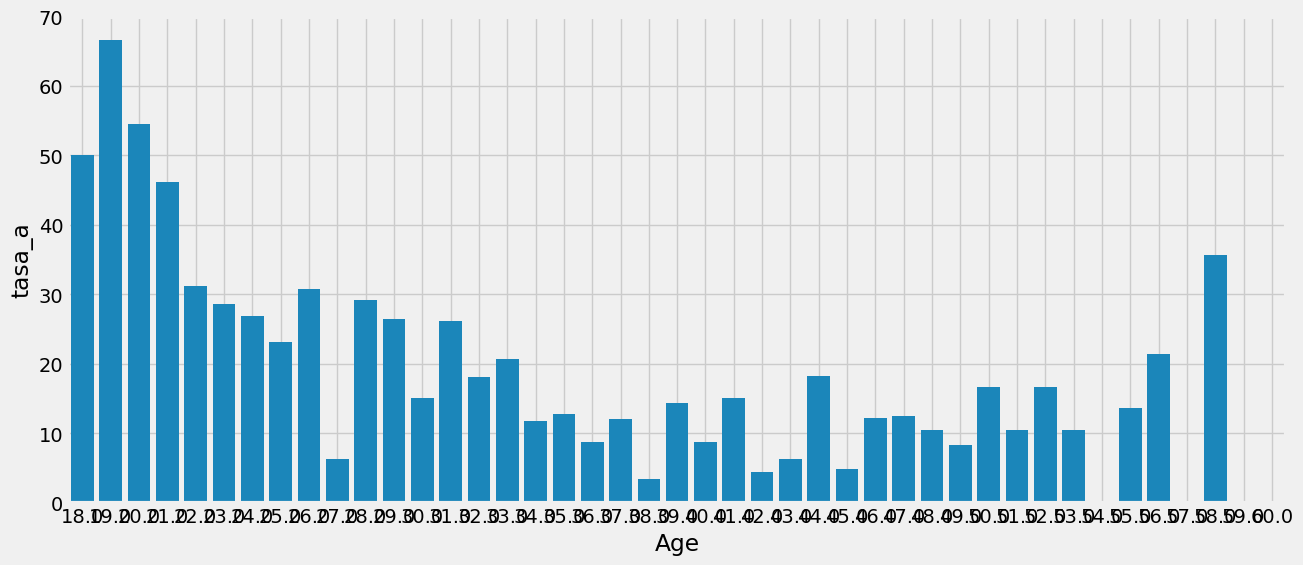

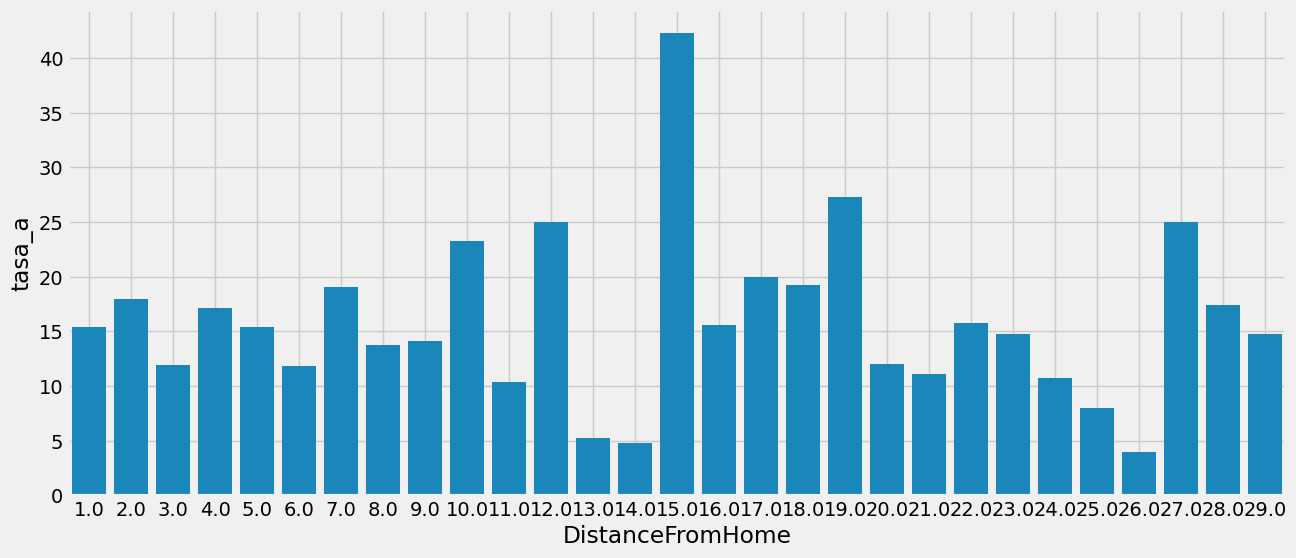

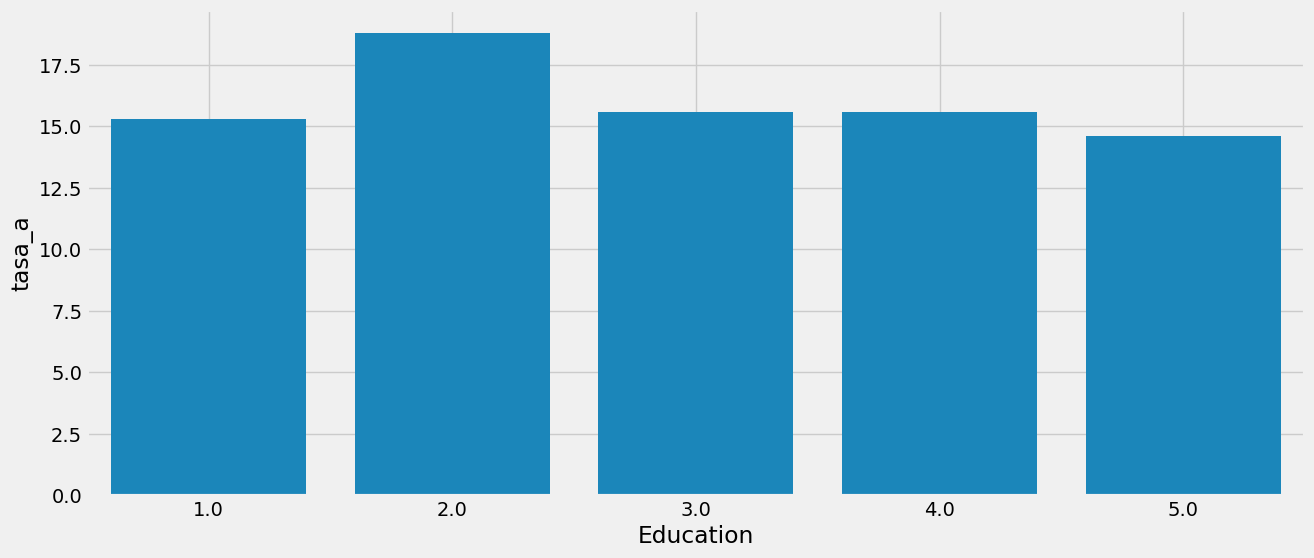

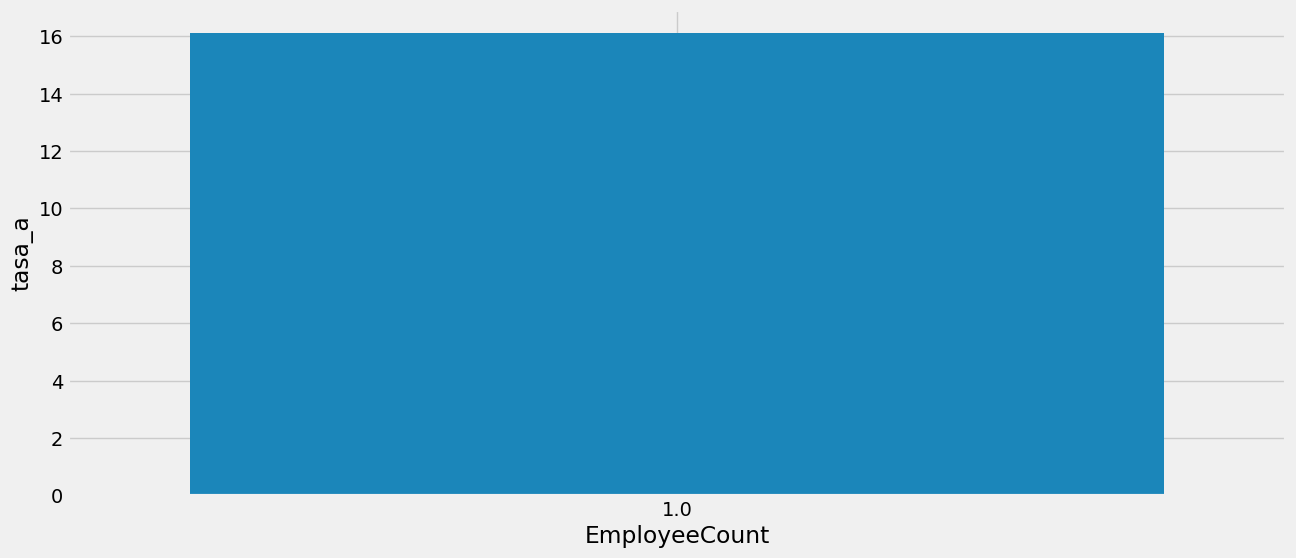

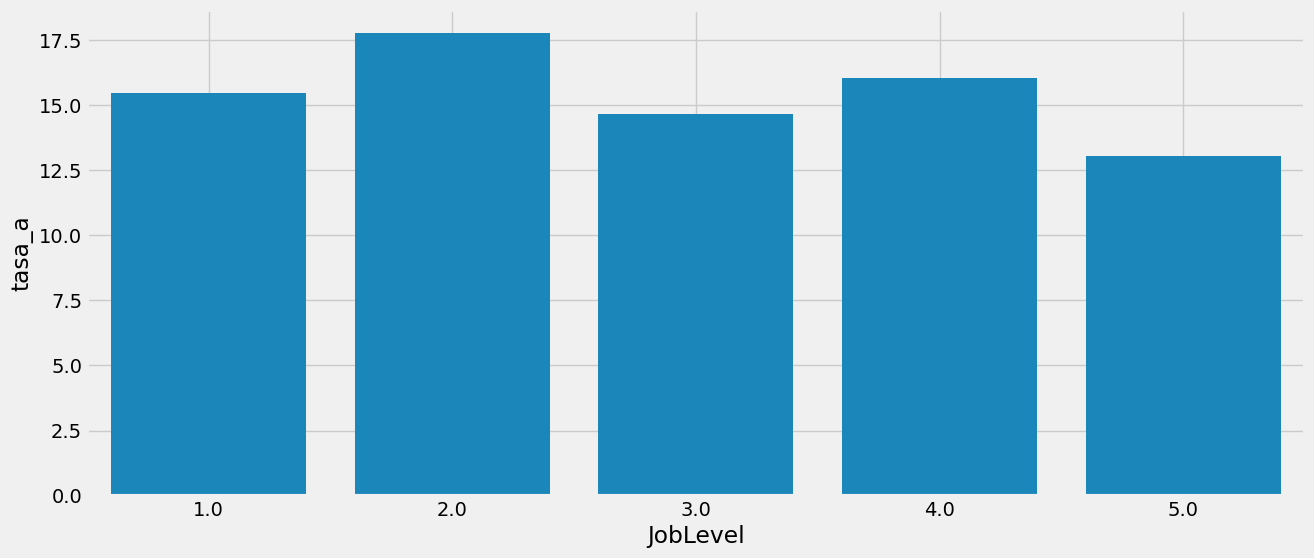

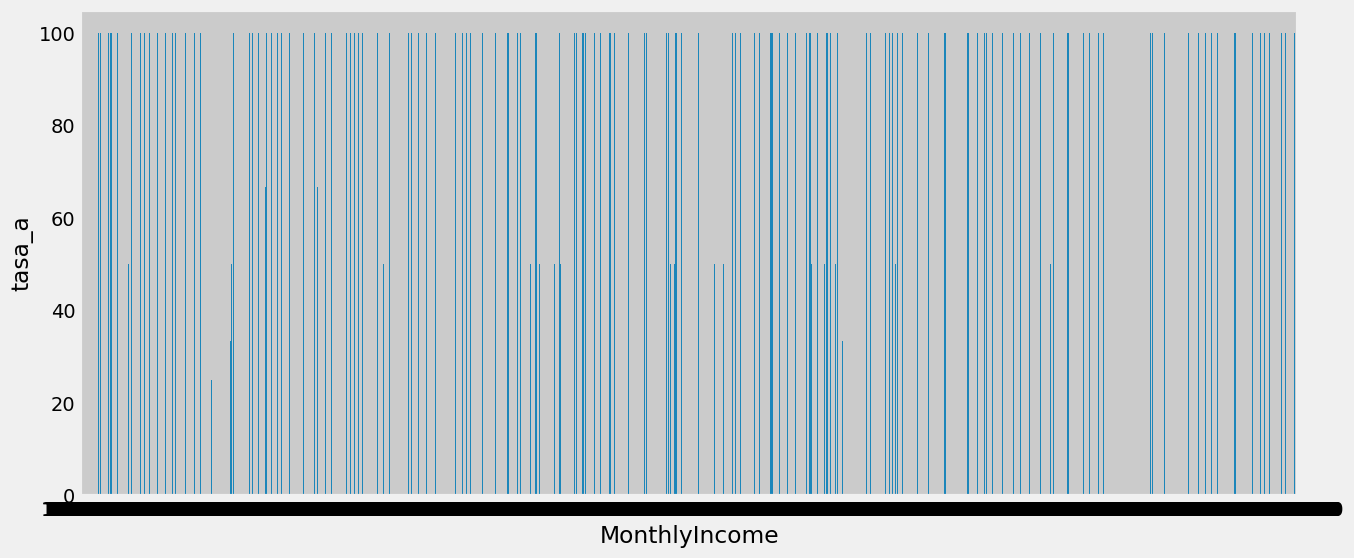

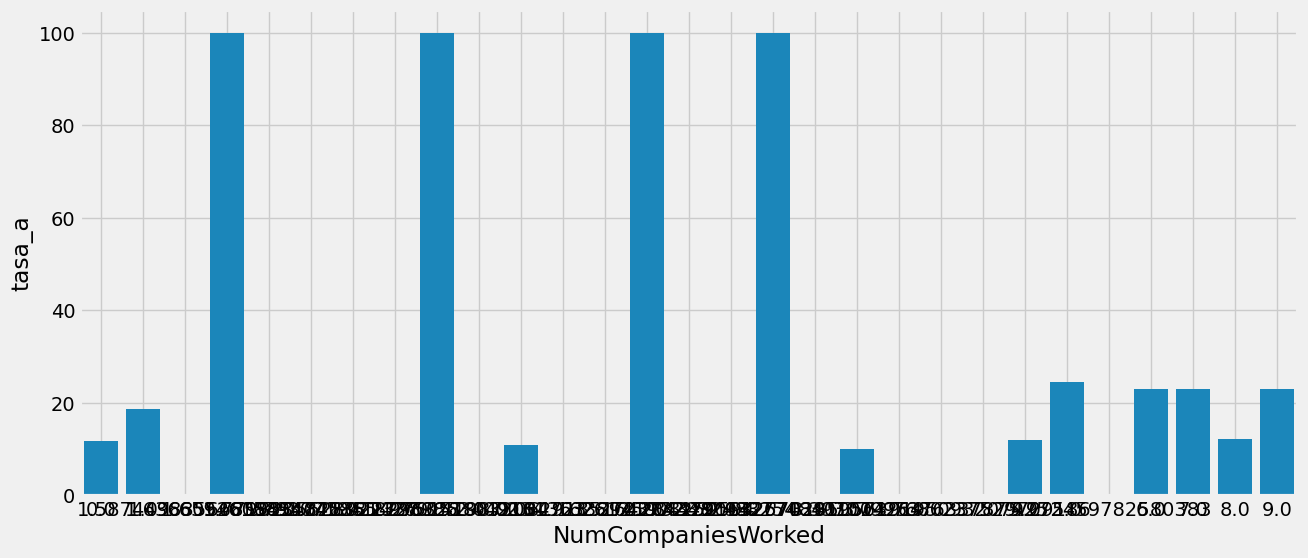

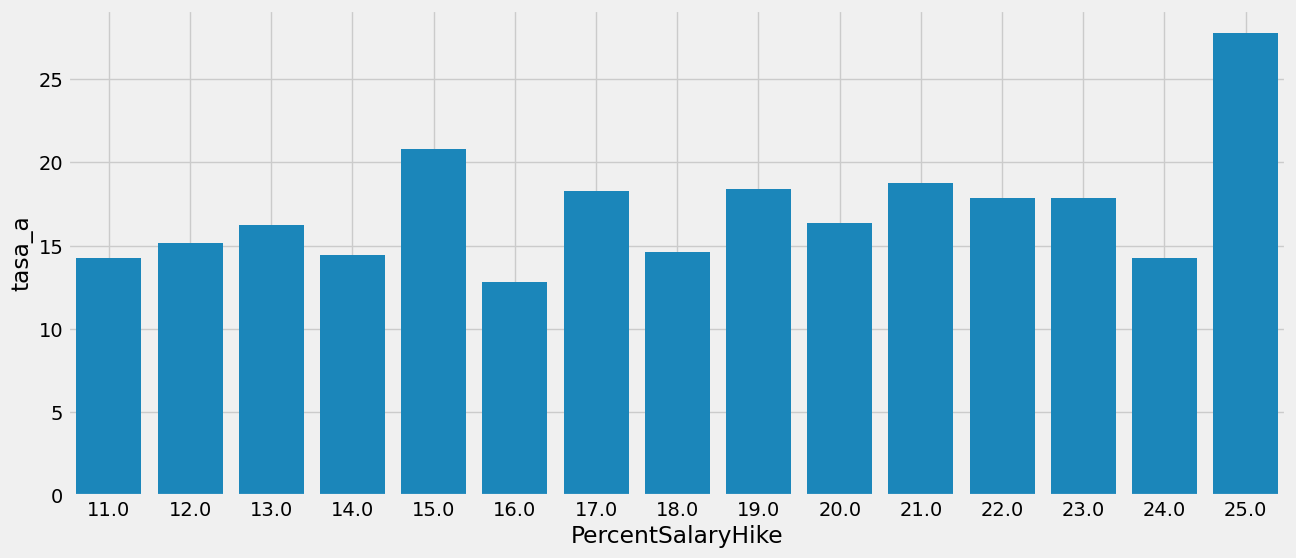

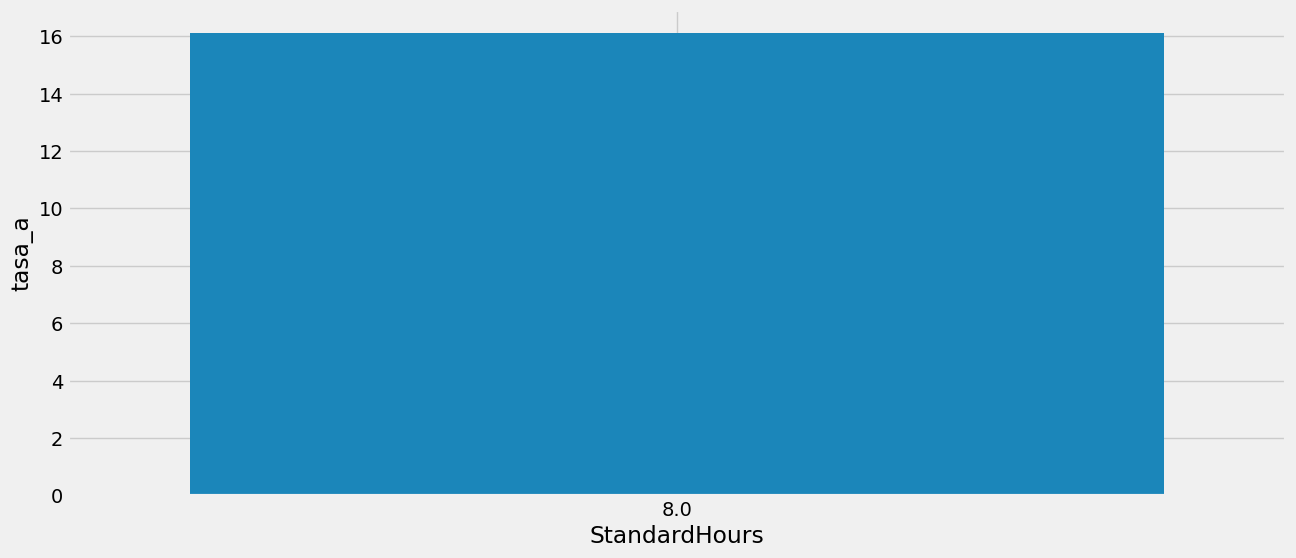

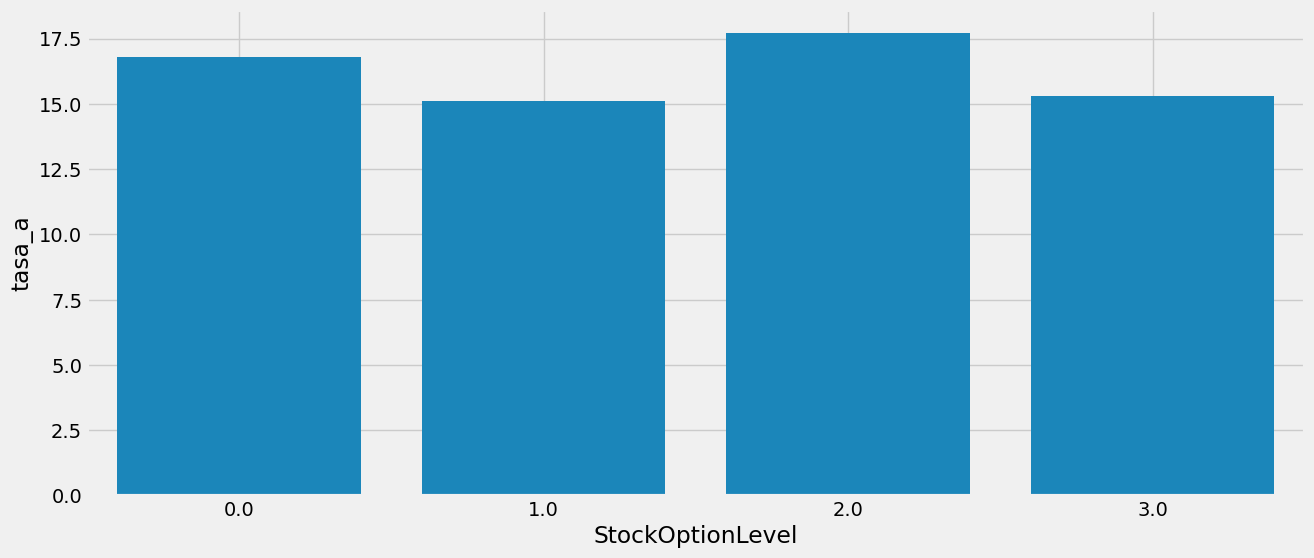

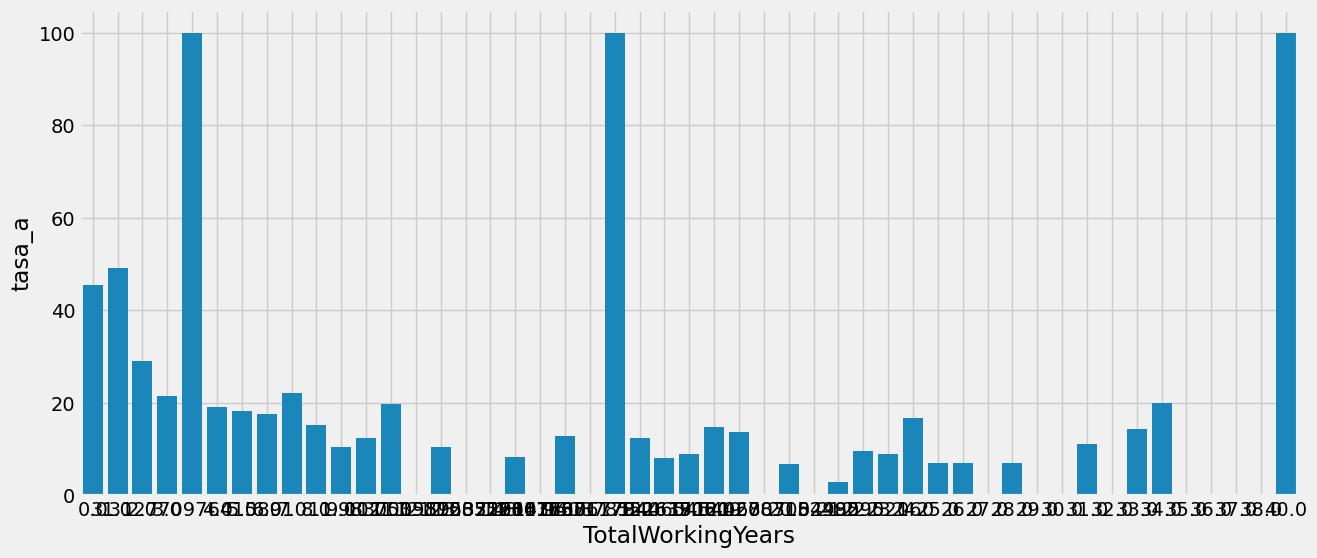

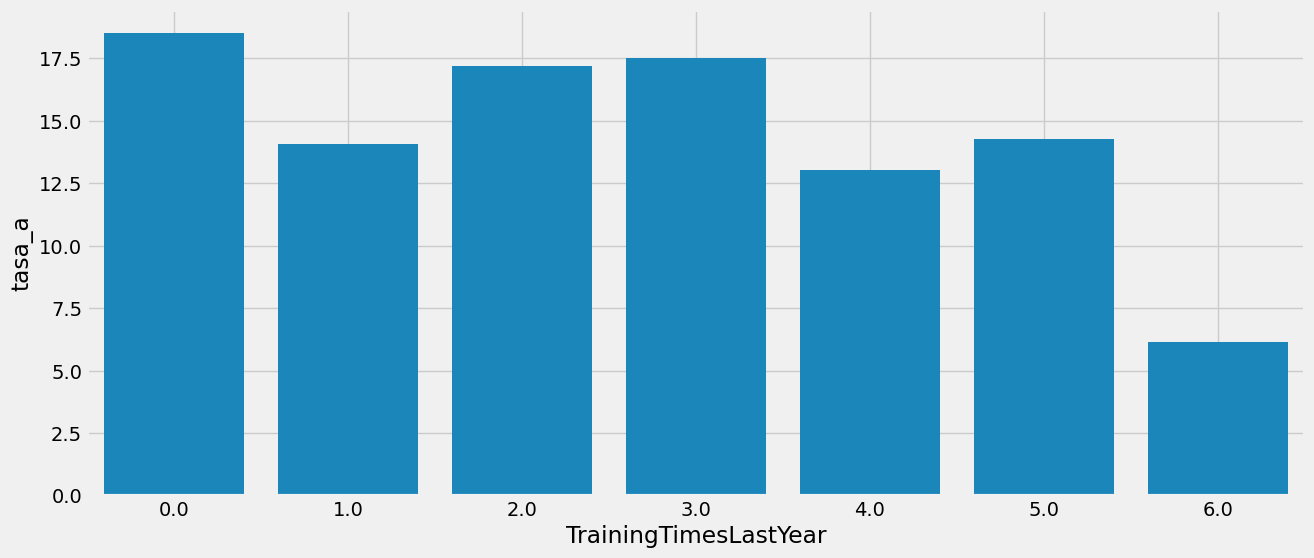

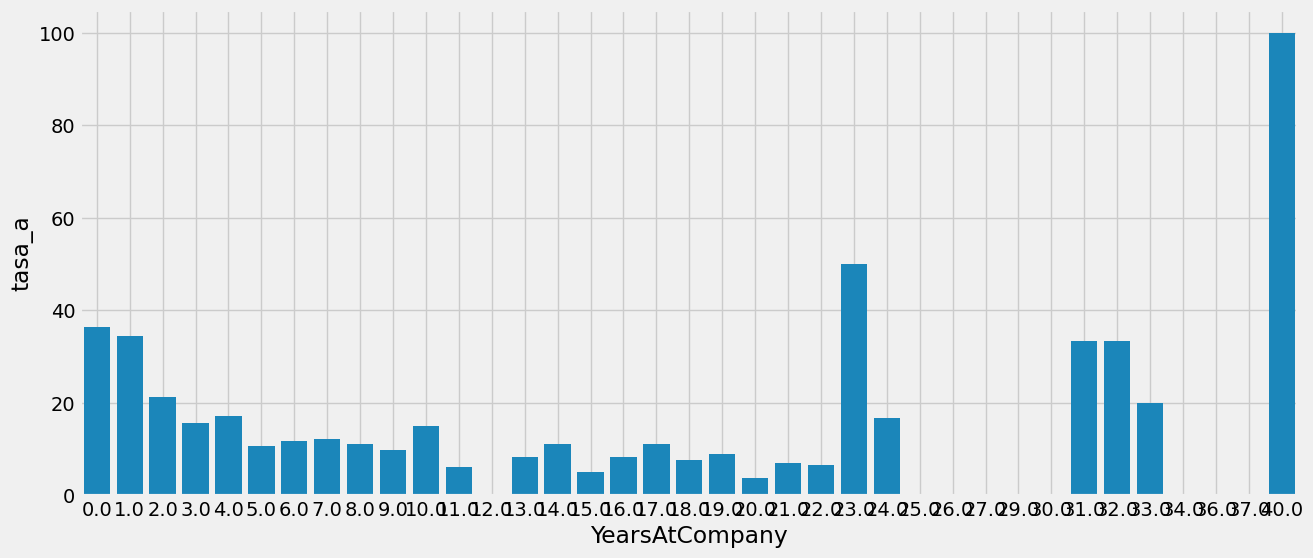

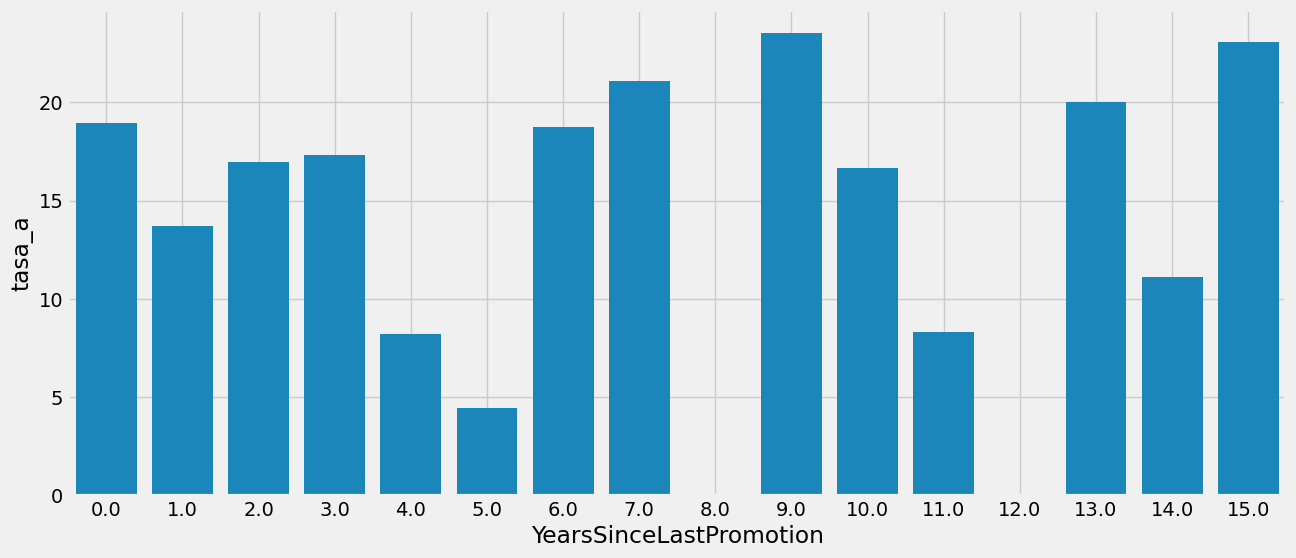

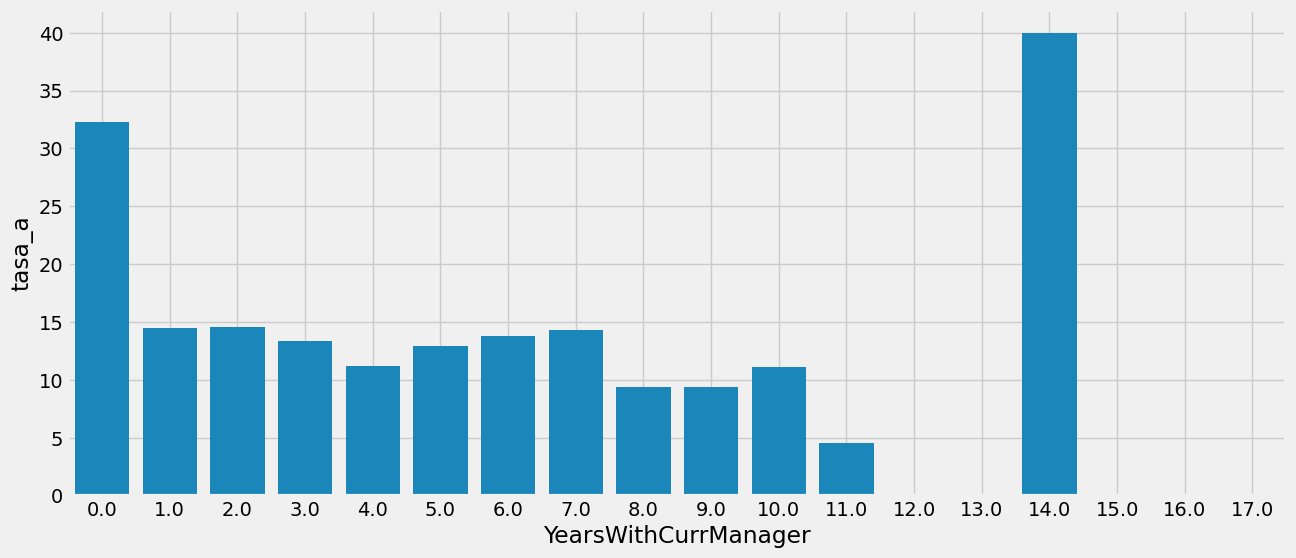

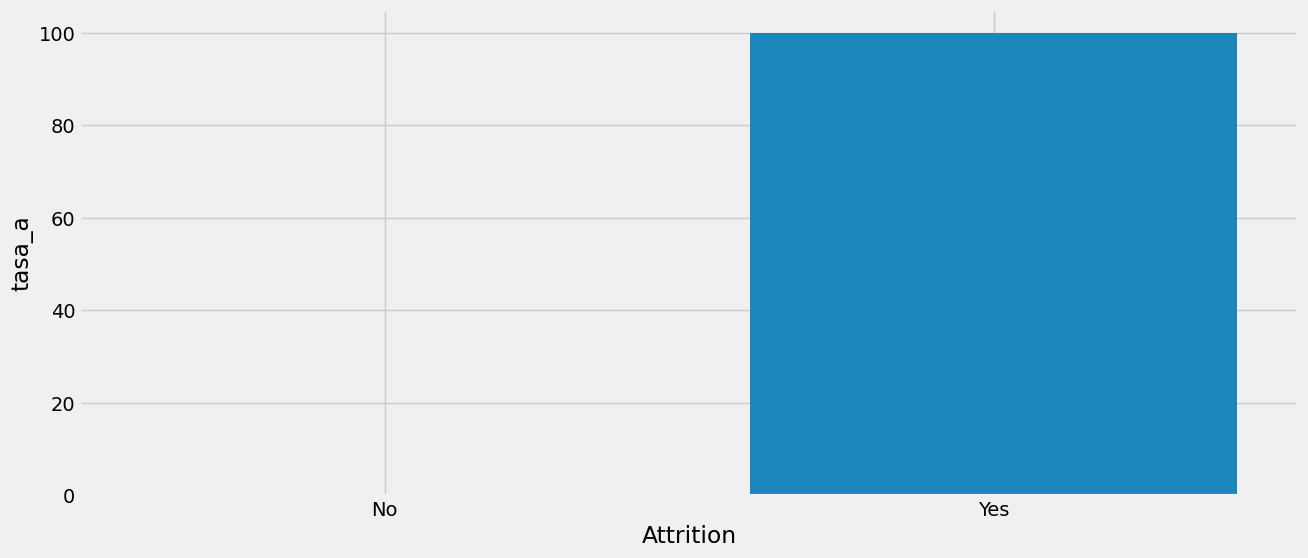

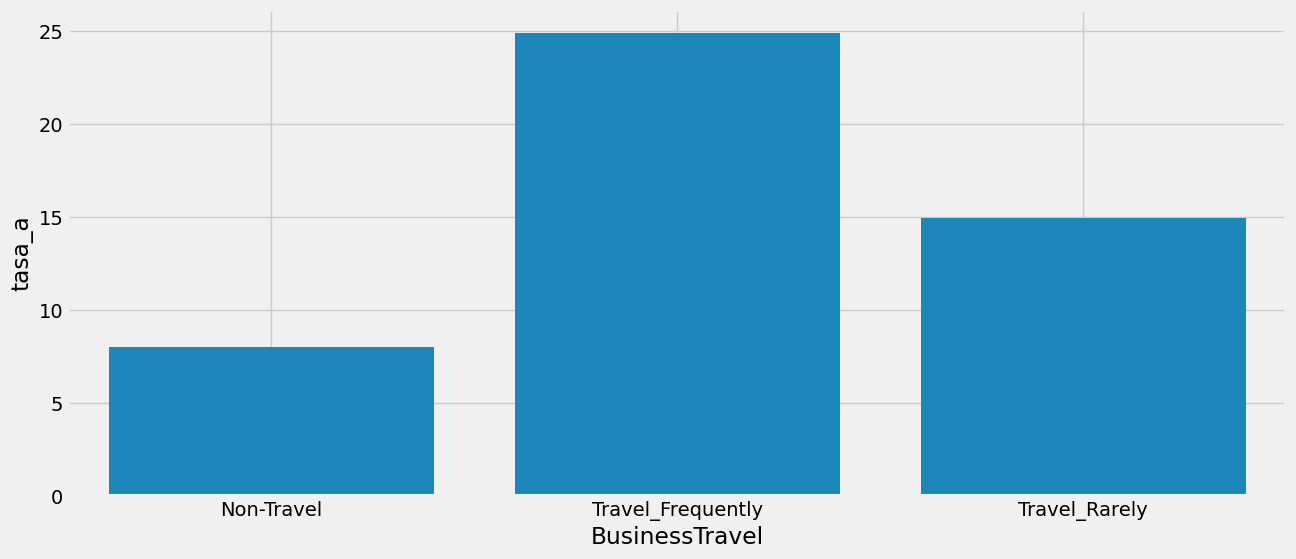

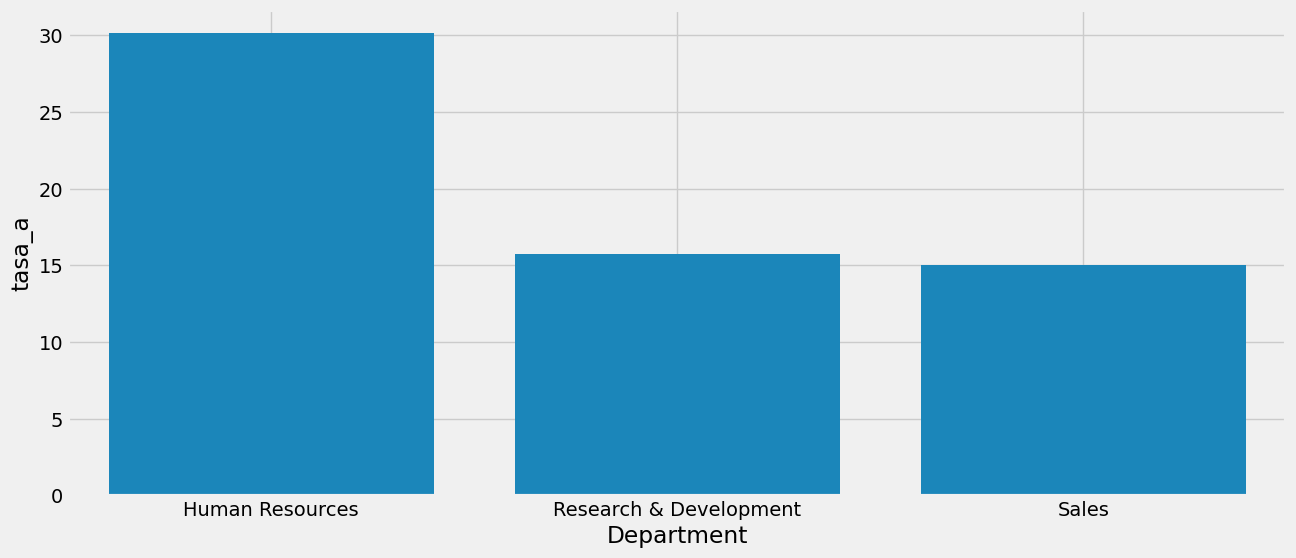

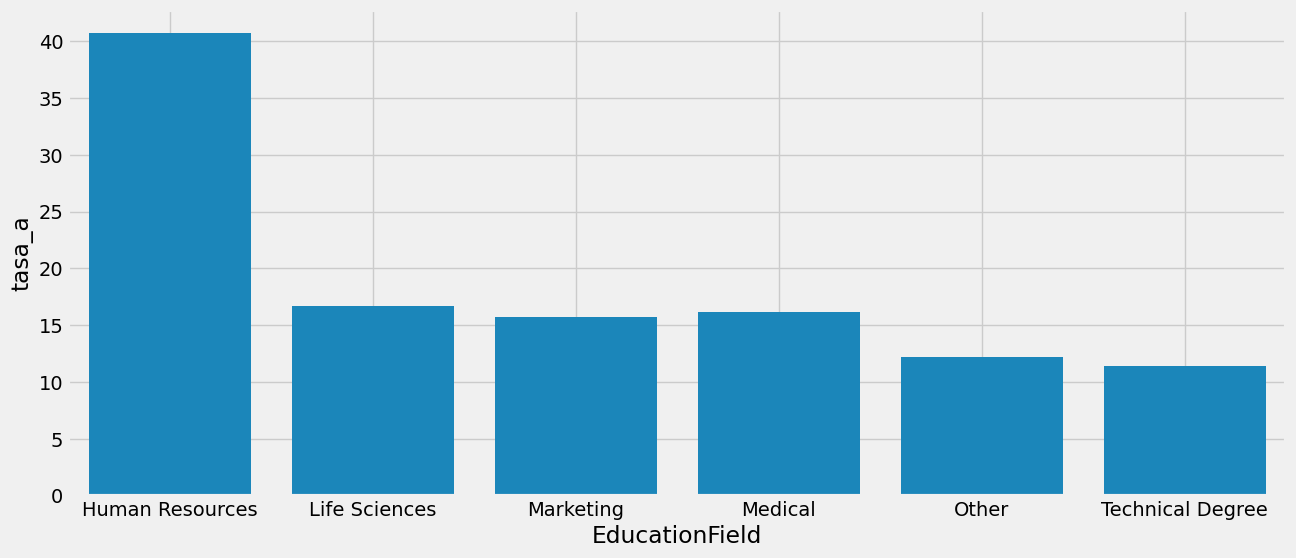

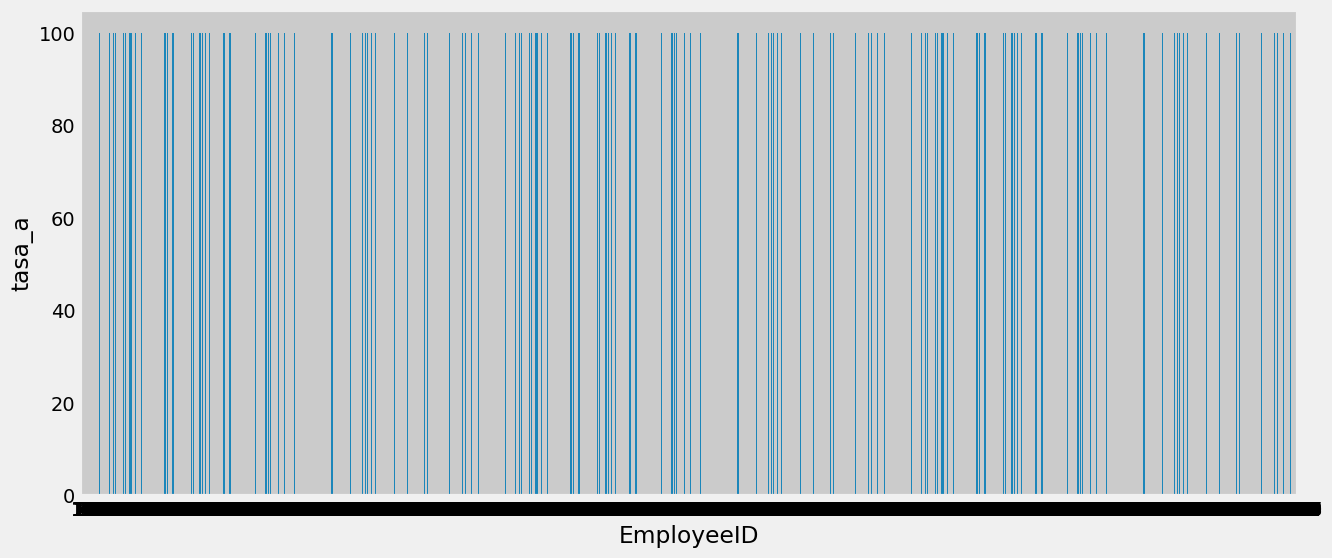

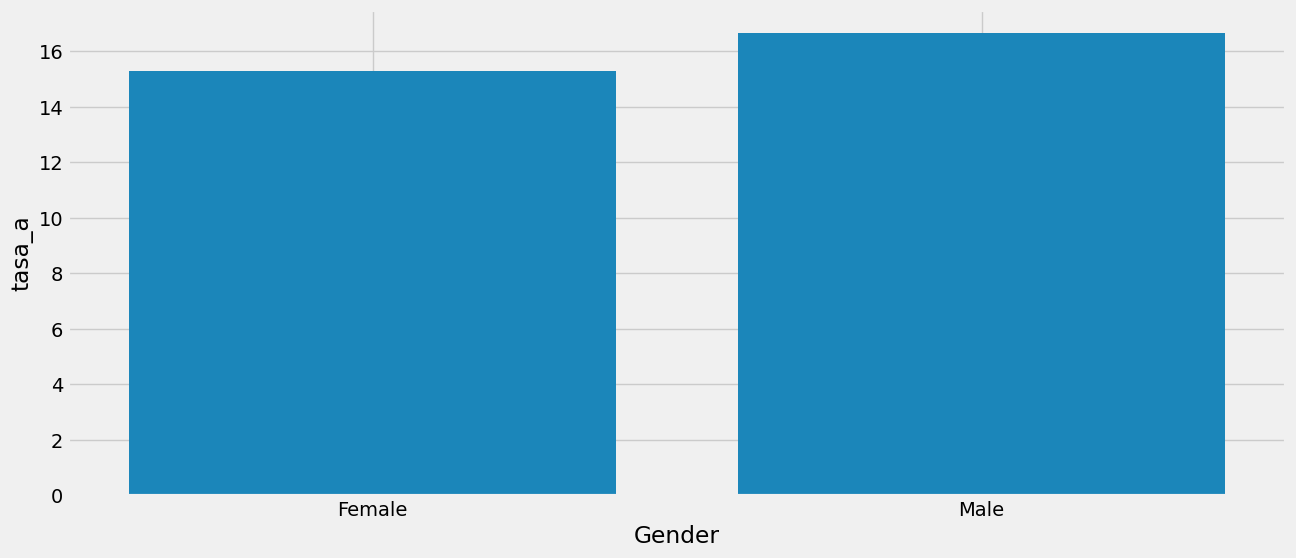

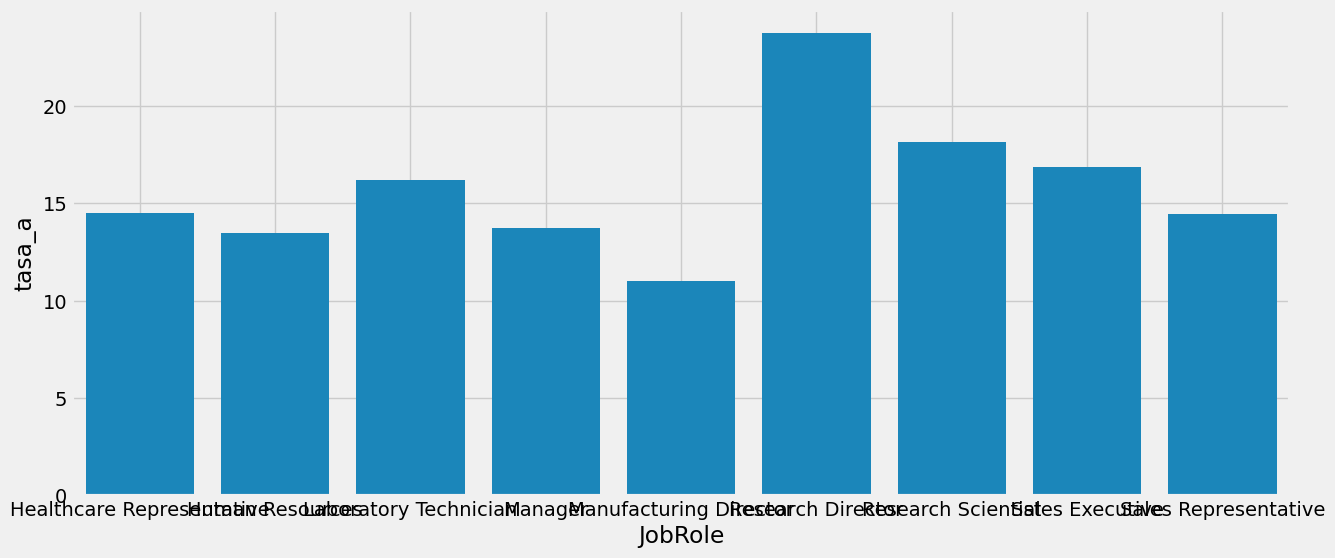

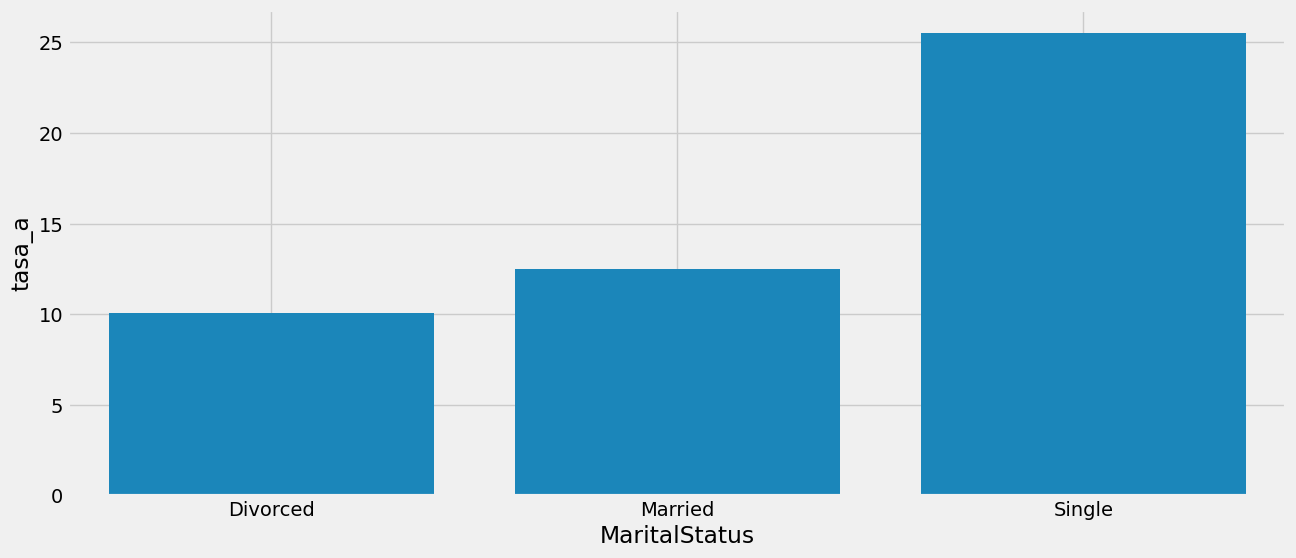

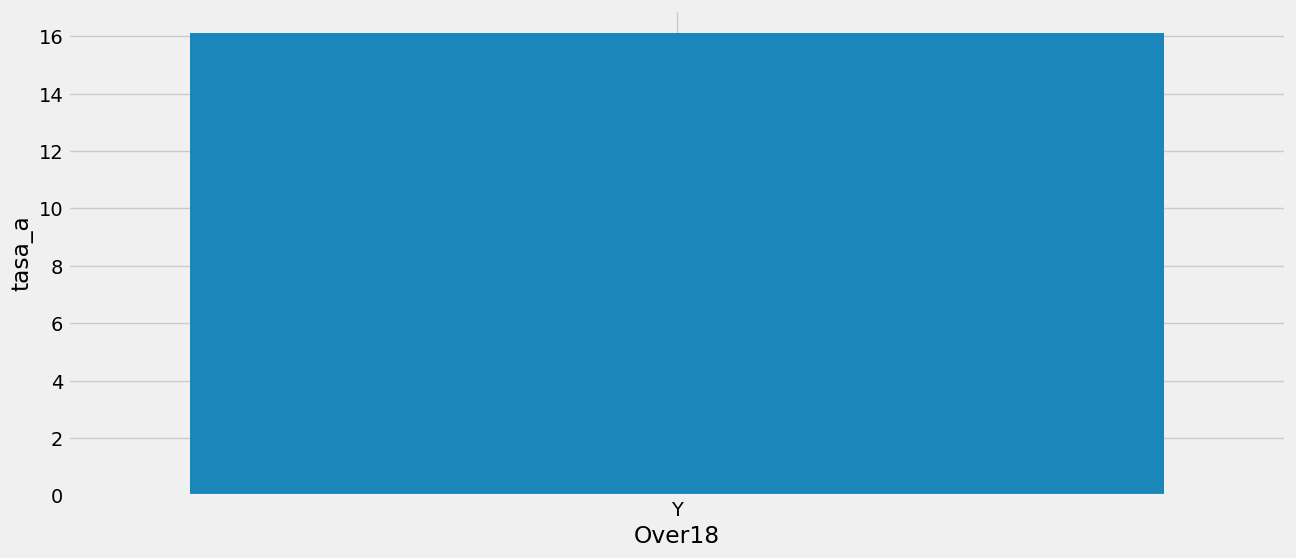

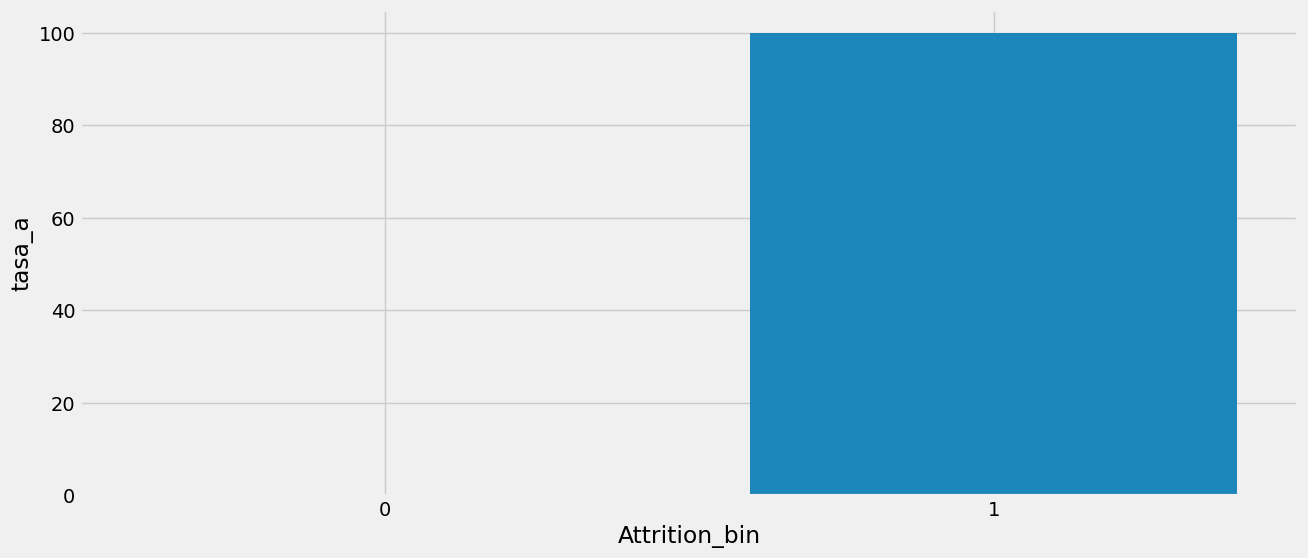

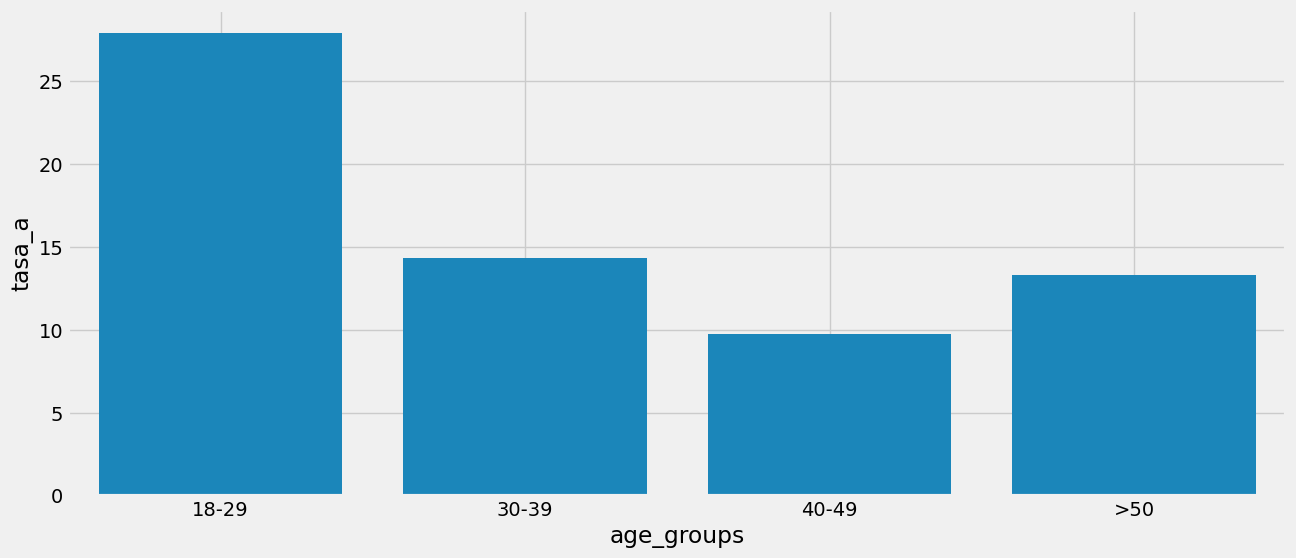

In [ ]:
for col in dfNew.columns:
  graficar_tasas_abandono(col,'Attrition_bin',type='bar')

In [ ]:
dfNew['MonthlyIncome'].describe()

count      4410.000000
mean      65029.312925
std       47068.888559
min       10090.000000
25%       29110.000000
50%       49190.000000
75%       83800.000000
max      199990.000000
Name: MonthlyIncome, dtype: float64

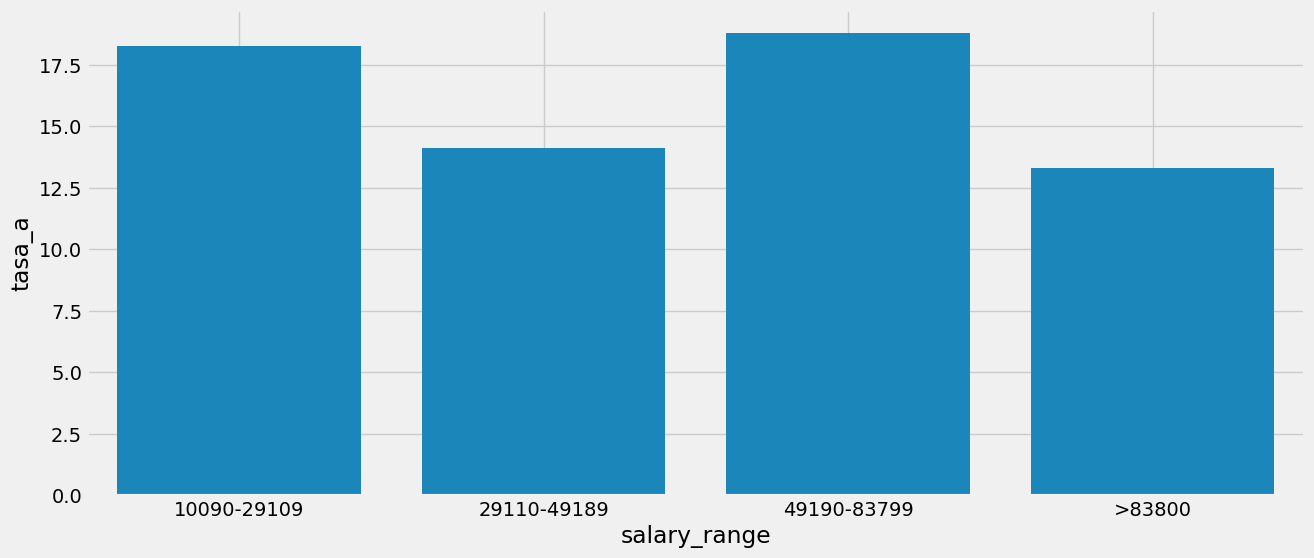

In [ ]:
# Grupos por rango de salario

# min: 10090
# max: 199990

dfNew.loc[:,'salary_range'] = '10090-29109'
dfNew.loc[dfNew['MonthlyIncome']>=83800,'salary_range'] = '>83800'
dfNew.loc[(dfNew['MonthlyIncome']>=29110)&(dfNew['MonthlyIncome']<=49189), 'salary_range'] = '29110-49189'
dfNew.loc[(dfNew['MonthlyIncome']>=49190)&(dfNew['MonthlyIncome']<=83799), 'salary_range'] = '49190-83799'

# Y grafiquemos la tasa de conversión para esta nueva columna
graficar_tasas_abandono('salary_range','Attrition_bin',type='bar')

In [ ]:
# Tasa de abandono para dos columnas
def graficar_ta_bivariada(col_list, orden=None):
  ta = dfNew.groupby(col_list)['Attrition_bin'].mean().to_frame().reset_index()

  # Gráfica
  plt.figure(figsize=(13,7))
  ax = sns.pointplot(x=ta['Attrition_bin'], y=ta[col_list[0]], hue=ta[col_list[1]], join=False, order=orden)
  ax.yaxis.grid(True)
  ax.xaxis.grid(True)
  plt.title(f'Tasa de abandono para {col_list[0]} y {col_list[1]}')
  plt.xlabel('Tasa de abandono (%)')
  plt.xlim((0,1));

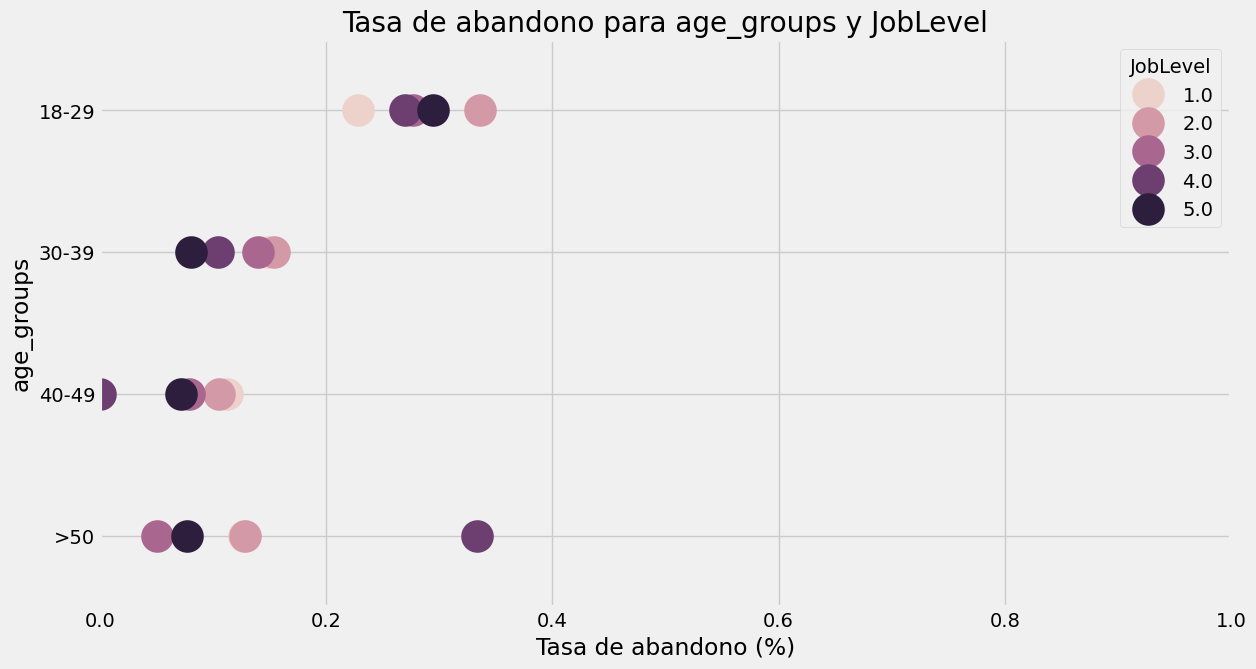

In [ ]:
graficar_ta_bivariada(['age_groups','JobLevel'])

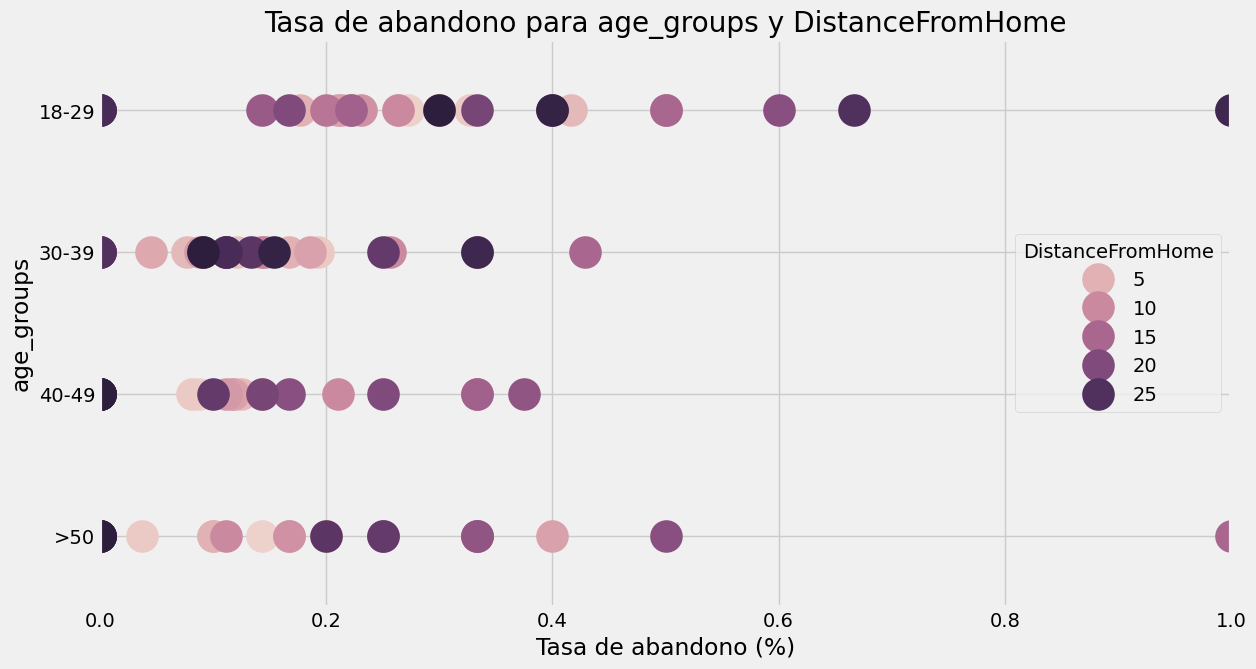

In [ ]:
graficar_ta_bivariada(['age_groups', 'DistanceFromHome'])

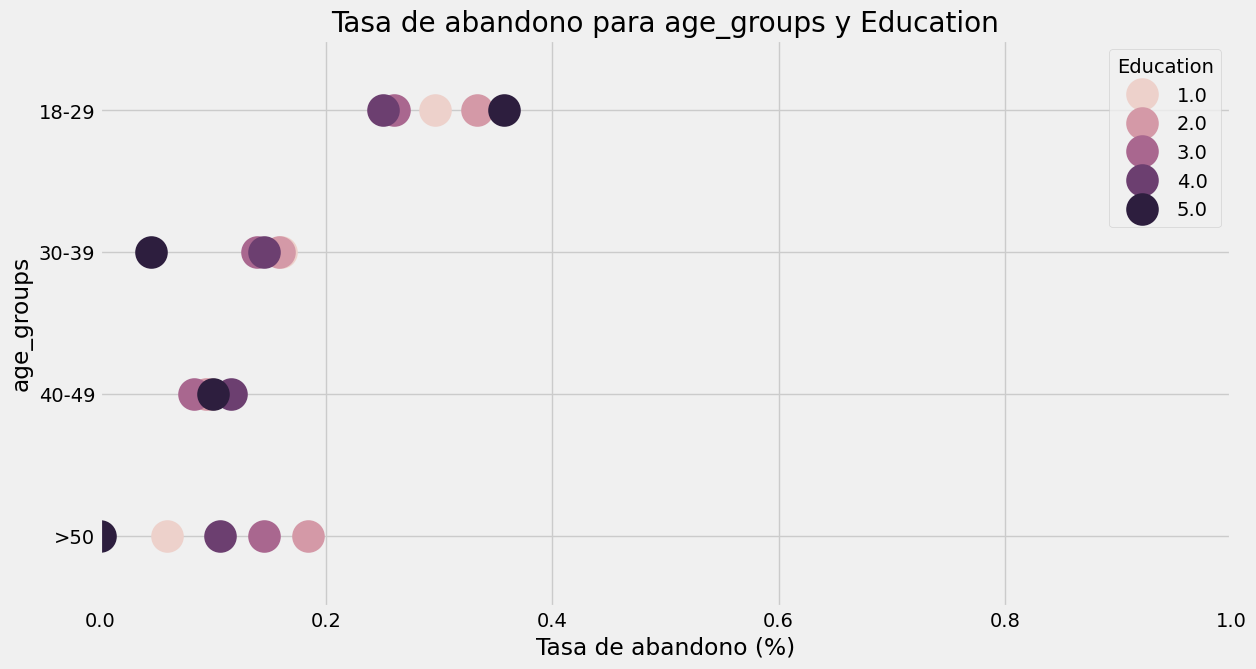

In [ ]:
graficar_ta_bivariada(['age_groups', 'Education'])

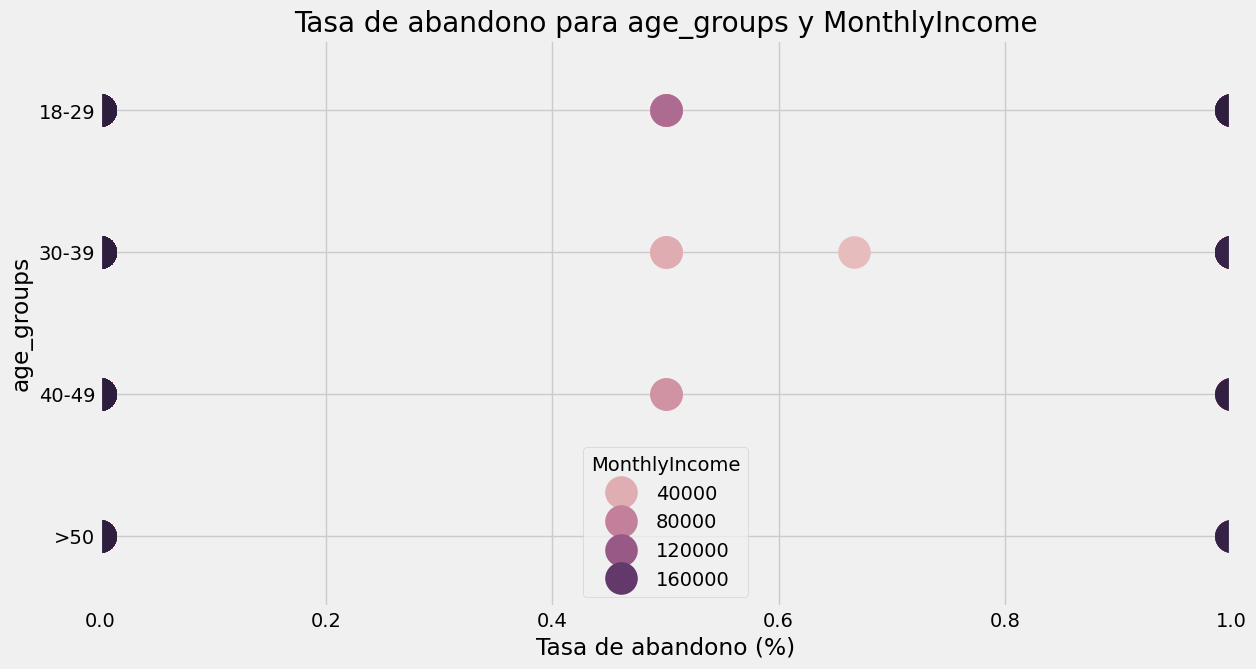

In [ ]:
graficar_ta_bivariada(['age_groups', 'MonthlyIncome'])

Variables que no tendrían un impacto en la predicción:

Numeric: EmployeeCount, EmployeeID, StandardHours (sólo un valor), StockOptionLevel, TrainingTimesLastYear, PercentSalaryHike,  DistanceFromHome, JobLevel, YearsSinceLastPromotion

Categoric: Attrition (variable respuesta), Over18 (sólo un valor)


Variables a utilizar dado que sí tendrían un impacto en si un empleado podría abandonar la empresa:

Numeric: Age, MonthlyIncome, NumCompaniesWorked, TotalWorkingYears, YearsAtCompany, YearsWithCurrManager, Education,

Categoric: BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus

# Select relevant data and change datatype


In [ ]:
# Attrition to 0 and 1 using LabelEncoder
dfNew['Attrition'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
dfNew['Attrition'].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dfNew['Attrition_encoded'] = le.fit_transform(dfNew.Attrition)

dfNew.head()

Age  DistanceFromHome  Education  EmployeeCount  JobLevel  MonthlyIncome  \
0  51.0               6.0        2.0            1.0       1.0       131160.0   
1  31.0              10.0        1.0            1.0       1.0        41890.0   
2  32.0              17.0        4.0            1.0       4.0       193280.0   
3  38.0               2.0        5.0            1.0       3.0        83210.0   
4  32.0              10.0        1.0            1.0       1.0        23420.0   

   NumCompaniesWorked  PercentSalaryHike  StandardHours  StockOptionLevel  \
0                 1.0               11.0            8.0               0.0   
1                 0.0               23.0            8.0               1.0   
2                 1.0               15.0            8.0               3.0   
3                 3.0               11.0            8.0               3.0   
4                 4.0               12.0            8.0               2.0   

   ...  EducationField  EmployeeID  Gender                    JobRole  \
0  ...   Life Sciences           1  Female  Healthcare Representative   
1  ...   Life Sciences           2  Female         Research Scientist   
2  ...           Other           3    Male            Sales Executive   
3  ...   Life Sciences           4    Male            Human Resources   
4  ...         Medical           5    Male            Sales Executive   

   MaritalStatus Over18 Attrition_bin age_groups salary_range  \
0        Married      Y             0        >50       >83800   
1         Single      Y             1      30-39  29110-49189   
2        Married      Y             0      30-39       >83800   
3        Married      Y             0      30-39  49190-83799   
4         Single      Y             0      30-39  10090-29109   

   Attrition_encoded  
0                  0  
1                  1  
2                  0  
3                  0  
4                  0  

[5 rows x 28 columns]

In [ ]:
dfNew.dtypes

Age                        float64
DistanceFromHome           float64
Education                  float64
EmployeeCount              float64
JobLevel                   float64
MonthlyIncome              float64
NumCompaniesWorked         float64
PercentSalaryHike          float64
StandardHours              float64
StockOptionLevel           float64
TotalWorkingYears          float64
TrainingTimesLastYear      float64
YearsAtCompany             float64
YearsSinceLastPromotion    float64
YearsWithCurrManager       float64
Attrition                   object
BusinessTravel              object
Department                  object
EducationField              object
EmployeeID                   int64
Gender                      object
JobRole                     object
MaritalStatus               object
Over18                      object
Attrition_bin                int64
age_groups                  object
salary_range                object
Attrition_encoded            int64
dtype: object

In [ ]:
# Numeric: Age, MonthlyIncome, NumCompaniesWorked, TotalWorkingYears, YearsAtCompany, YearsWithCurrManager, Education,
# Categoric: BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus

dfML = dfNew[['Age', 'MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager', 'Education', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Attrition_encoded']]
dfML.head()

Age  MonthlyIncome  NumCompaniesWorked  TotalWorkingYears  YearsAtCompany  \
0  51.0       131160.0                 1.0                1.0             1.0   
1  31.0        41890.0                 0.0                6.0             5.0   
2  32.0       193280.0                 1.0                5.0             5.0   
3  38.0        83210.0                 3.0               13.0             8.0   
4  32.0        23420.0                 4.0                9.0             6.0   

   YearsWithCurrManager  Education     BusinessTravel              Department  \
0                   0.0        2.0      Travel_Rarely                   Sales   
1                   4.0        1.0  Travel_Frequently  Research & Development   
2                   3.0        4.0  Travel_Frequently  Research & Development   
3                   5.0        5.0         Non-Travel  Research & Development   
4                   4.0        1.0      Travel_Rarely  Research & Development   

  EducationField  Gender                    JobRole MaritalStatus  \
0  Life Sciences  Female  Healthcare Representative       Married   
1  Life Sciences  Female         Research Scientist        Single   
2          Other    Male            Sales Executive       Married   
3  Life Sciences    Male            Human Resources       Married   
4        Medical    Male            Sales Executive        Single   

   Attrition_encoded  
0                  0  
1                  1  
2                  0  
3                  0  
4                  0

In [ ]:
print(dfML.shape)

(4410, 14)


In [ ]:
df_dummies = pd.get_dummies(dfML)

In [ ]:
df_dummies.head()

Age  MonthlyIncome  NumCompaniesWorked  TotalWorkingYears  YearsAtCompany  \
0  51.0       131160.0                 1.0                1.0             1.0   
1  31.0        41890.0                 0.0                6.0             5.0   
2  32.0       193280.0                 1.0                5.0             5.0   
3  38.0        83210.0                 3.0               13.0             8.0   
4  32.0        23420.0                 4.0                9.0             6.0   

   YearsWithCurrManager  Education  Attrition_encoded  \
0                   0.0        2.0                  0   
1                   4.0        1.0                  1   
2                   3.0        4.0                  0   
3                   5.0        5.0                  0   
4                   4.0        1.0                  0   

   BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  ...  \
0                          0                                 0  ...   
1                          0                                 1  ...   
2                          0                                 1  ...   
3                          1                                 0  ...   
4                          0                                 0  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              0                0   
3                              0                0   
4                              0                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        0   
1                           1                        0   
2                           0                        1   
3                           0                        0   
4                           0                        1   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   MaritalStatus_Married  MaritalStatus_Single  
0                      1                     0  
1                      0                     1  
2                      1                     0  
3                      1                     0  
4                      0                     1  

[5 rows x 34 columns]

In [ ]:
def feature_imp(df, model):
    # fi = pd.DataFrame()
    # fi['feature'] = df.columns
    # fi['importance'] = model.feature_importances_
    # return fi.sort_values(by='importance', ascending=False)
      fi = pd.DataFrame()
      fi['feature'] = df.columns

      try:
        fi['importance'] = model.feature_importances_
      except AttributeError as e:
        print(f"Error: {e}")
        print("Model object does not have 'feature_importances_' attribute.")

      return fi.sort_values(by='importance', ascending=False)

# Logistic Regression


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dfscaled = pd.DataFrame(scaler.fit_transform(df_dummies), columns = df_dummies.columns)
dfscaled.head()

Age  MonthlyIncome  NumCompaniesWorked  TotalWorkingYears  \
0  0.785714       0.637546            0.111111              0.025   
1  0.309524       0.167457            0.000000              0.150   
2  0.333333       0.964666            0.111111              0.125   
3  0.476190       0.385045            0.333333              0.325   
4  0.333333       0.070195            0.444444              0.225   

   YearsAtCompany  YearsWithCurrManager  Education  Attrition_encoded  \
0           0.025              0.000000       0.25                0.0   
1           0.125              0.235294       0.00                1.0   
2           0.125              0.176471       0.75                0.0   
3           0.200              0.294118       1.00                0.0   
4           0.150              0.235294       0.00                0.0   

   BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  ...  \
0                        0.0                               0.0  ...   
1                        0.0                               1.0  ...   
2                        0.0                               1.0  ...   
3                        1.0                               0.0  ...   
4                        0.0                               0.0  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                            0.0              0.0   
1                            0.0              0.0   
2                            0.0              0.0   
3                            0.0              0.0   
4                            0.0              0.0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             0.0                        0.0   
4                             0.0                        0.0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                         0.0                      0.0   
1                         1.0                      0.0   
2                         0.0                      1.0   
3                         0.0                      0.0   
4                         0.0                      1.0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                           0.0                     0.0   
1                           0.0                     0.0   
2                           0.0                     0.0   
3                           0.0                     0.0   
4                           0.0                     0.0   

   MaritalStatus_Married  MaritalStatus_Single  
0                    1.0                   0.0  
1                    0.0                   1.0  
2                    1.0                   0.0  
3                    1.0                   0.0  
4                    0.0                   1.0  

[5 rows x 34 columns]

In [ ]:
predictors = [var for var in dfscaled if var not in ['Attrition_encoded']]

predictors

['Age',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsWithCurrManager',
 'Education',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Female',
 'Gender_Male',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single']

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfscaled[predictors], dfscaled['Attrition_encoded'], test_size=0.20, stratify=dfscaled['Attrition_encoded'], random_state=16)

In [ ]:
y_train.mean()

0.161281179138322

In [ ]:
y_test.mean()

0.16099773242630386

In [ ]:
X_train.shape

(3528, 33)

In [ ]:
X_test.shape

(882, 33)

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[732,   8],
       [132,  10]])

Text(0.5, 427.9555555555555, 'Predicted label')

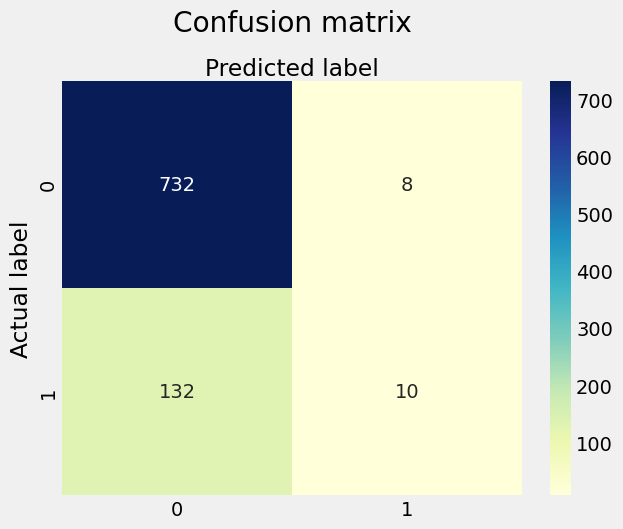

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
target_names = ['stay', 'left']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        stay       0.85      0.99      0.91       740
        left       0.56      0.07      0.12       142

    accuracy                           0.84       882
   macro avg       0.70      0.53      0.52       882
weighted avg       0.80      0.84      0.79       882



In [ ]:
y_test.value_counts()[0] / y_test.shape[0]

0.8390022675736961

In [ ]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 83.87%
Leaving Rate: 16.13%
===============TEST=================
Staying Rate: 83.90%
Leaving Rate: 16.10%


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train, y_train)

evaluate(lr_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2928   31]
 [ 525   44]]
ACCURACY SCORE:
0.8424
CLASSIFICATION REPORT:
                   0.0         1.0  accuracy    macro avg  weighted avg
precision     0.847958    0.586667  0.842404     0.717312      0.805817
recall        0.989523    0.077329  0.842404     0.533426      0.842404
f1-score      0.913288    0.136646  0.842404     0.524967      0.788030
support    2959.000000  569.000000  0.842404  3528.000000   3528.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[732   8]
 [132  10]]
ACCURACY SCORE:
0.8413
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.847222    0.555556   0.84127    0.701389      0.800265
recall       0.989189    0.070423   0.84127    0.529806      0.841270
f1-score     0.912718    0.125000   0.84127    0.518859      0.785897
support    740.000000  142.000000   0.84127  882.000000    882.000000


In [ ]:
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, lr_clf.predict(X_test)),
    },
}

In [ ]:
# X = df_dummies.drop('Attrition_encoded', axis=1)
# df = feature_imp(X, lr_clf)[:40]

# df.set_index('feature', inplace=True)
# df.plot(kind='barh', figsize=(10, 10))
# plt.title('Feature Importance according to Logistic Regression')

# Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier()
dt_model.fit(X_train[predictors],y_train)

dt_pred = dt_model.predict(X_test[predictors])

In [ ]:
print(confusion_matrix(y_test,dt_pred))

[[734   6]
 [  9 133]]


In [ ]:
cnf_matrix_dt = metrics.confusion_matrix(y_test, dt_pred)
cnf_matrix_dt

print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       740
         1.0       0.96      0.94      0.95       142

    accuracy                           0.98       882
   macro avg       0.97      0.96      0.97       882
weighted avg       0.98      0.98      0.98       882



Text(0.5, 427.9555555555555, 'Predicted label')

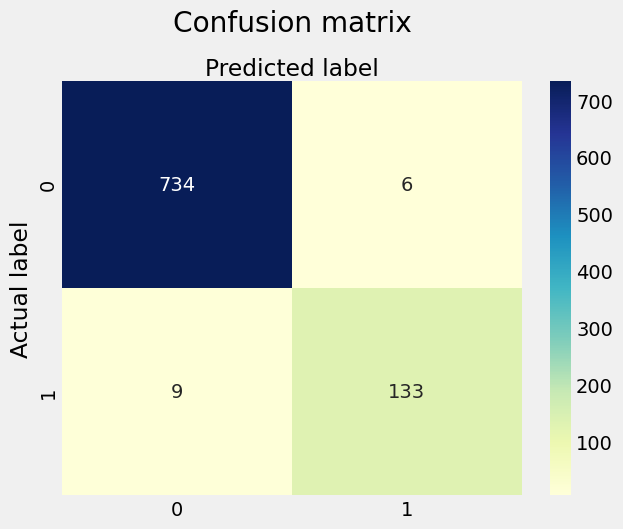

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_dt), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
evaluate(dt_model, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2959    0]
 [   0  569]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
              0.0    1.0  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    2959.0  569.0       1.0     3528.0        3528.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[734   6]
 [  9 133]]
ACCURACY SCORE:
0.9830
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.987887    0.956835  0.982993    0.972361      0.982888
recall       0.991892    0.936620  0.982993    0.964256      0.982993
f1-score     0.989885    0.946619  0.982993    0.968252      0.982920
support    740.000000  142.000000  0.982993  882.000000    882.000000


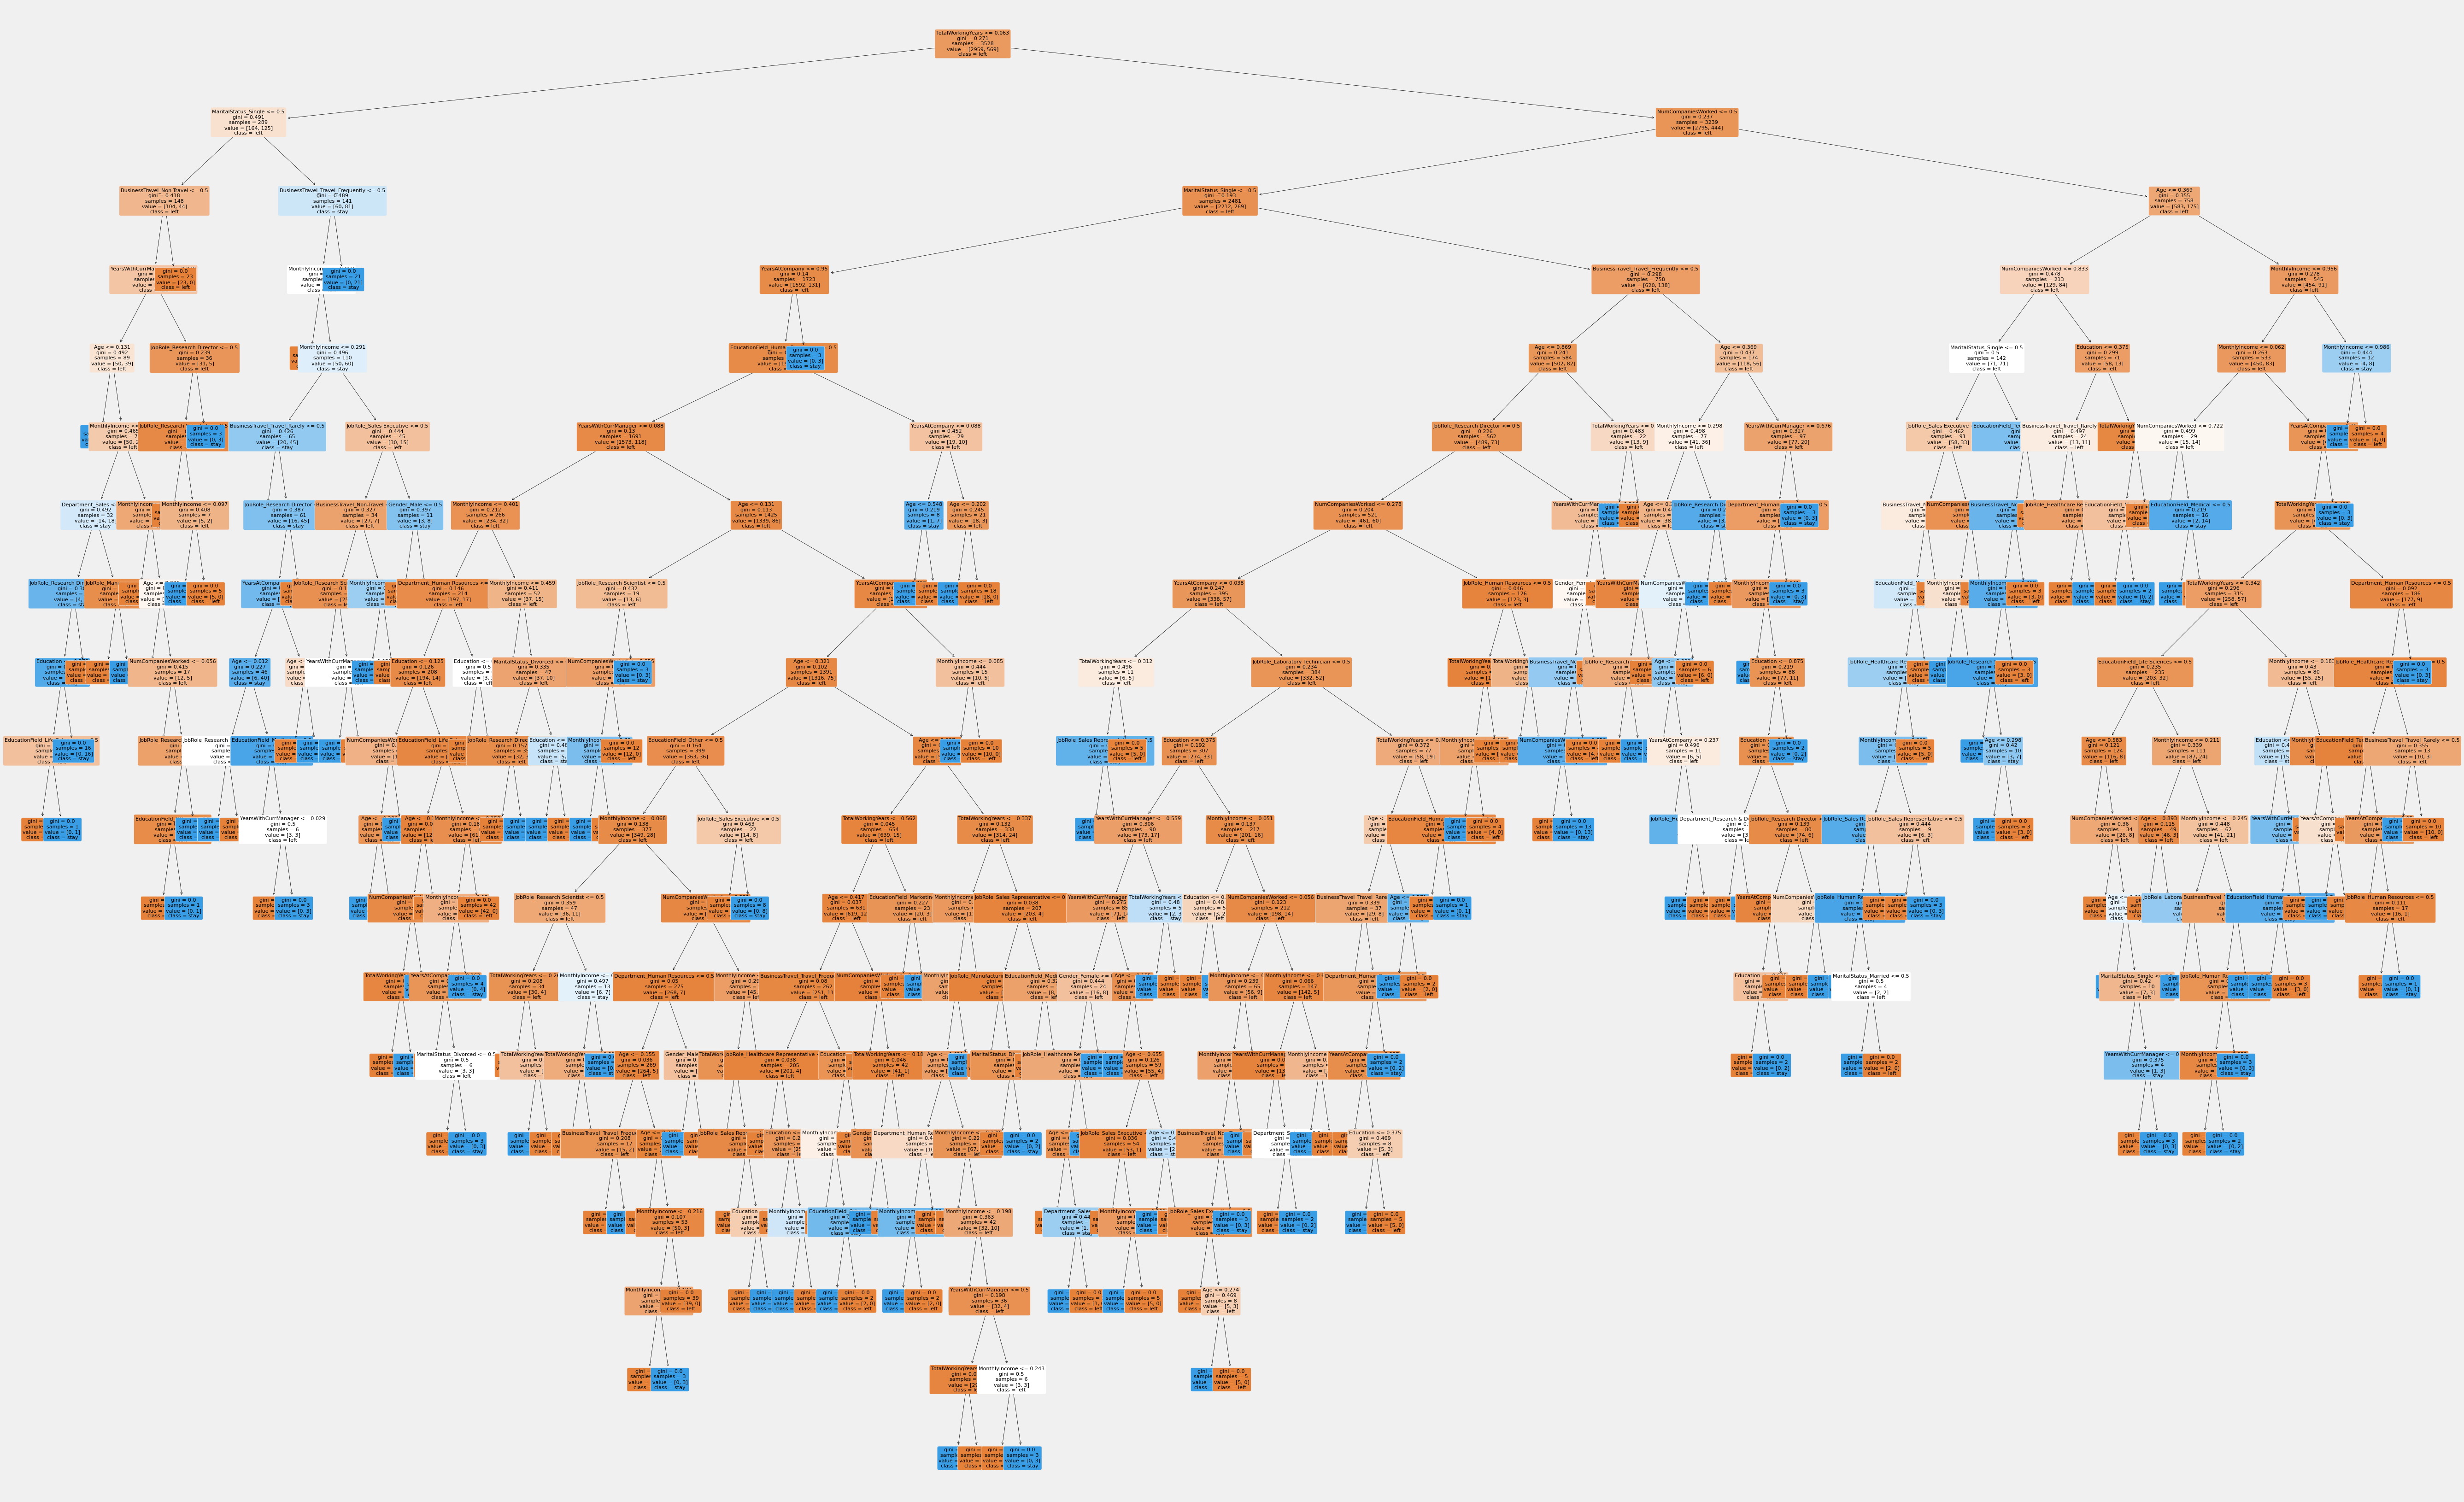

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# dot_data = StringIO()
# export_graphviz(dt_model, out_file=dot_data,
#                 filled=True, rounded=True,
#                 special_characters=True, feature_names = predictors,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png('attrition.png')
# Image(graph.create_png())

from sklearn import tree

plt.figure(figsize=(60, 40))
tree.plot_tree(dt_model,
               filled=True, rounded=True,
               feature_names = X_train.columns,
               class_names = ['left','stay'],
               fontsize=8)
plt.show()

In [ ]:
scores_dict = {
    'Decision Tree': {
        'Train': roc_auc_score(y_train, dt_model.predict(X_train)),
        'Test': roc_auc_score(y_test, dt_model.predict(X_test)),
    },
}

Text(0.5, 1.0, 'Feature Importance according to Decision Tree')

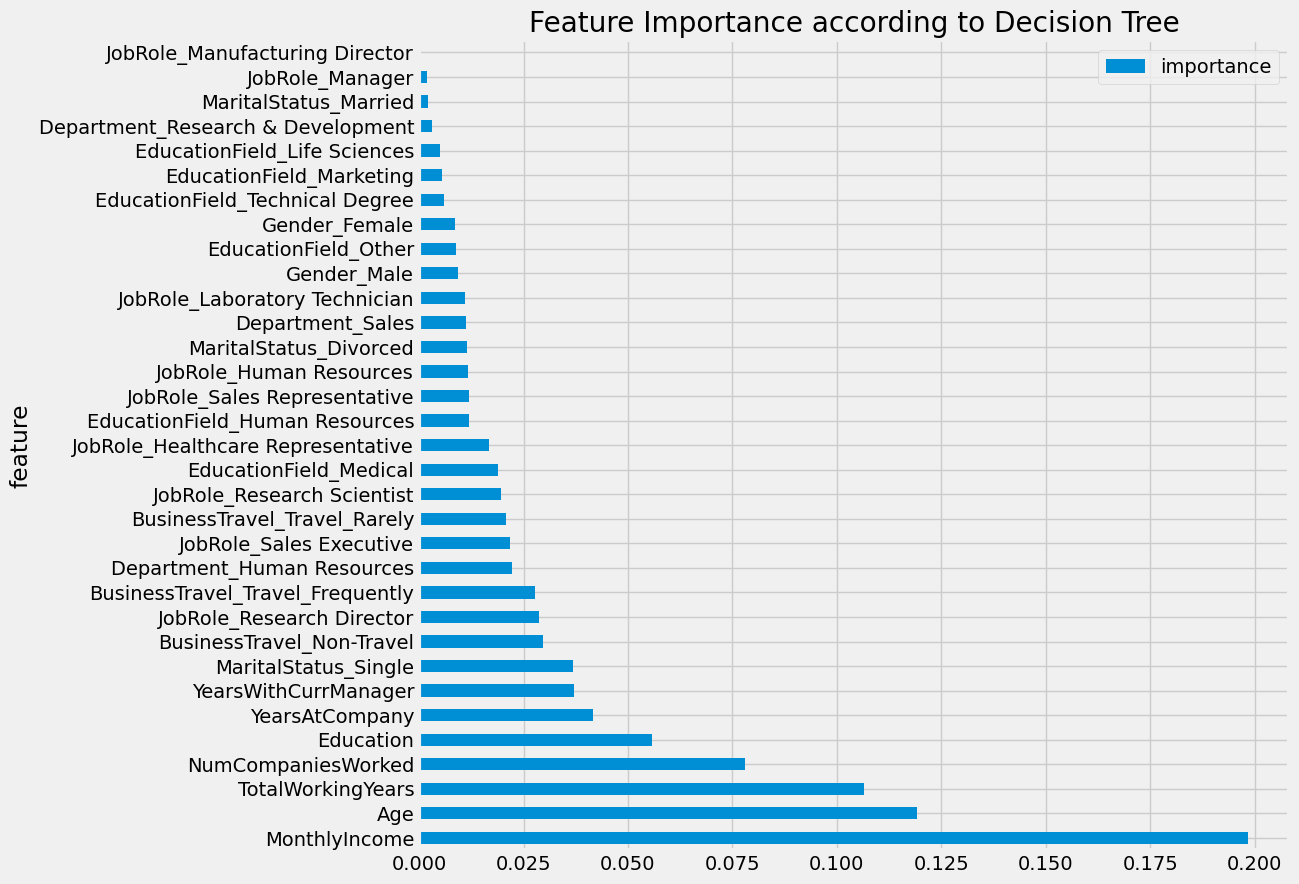

In [ ]:
X = df_dummies.drop('Attrition_encoded', axis=1)
df = feature_imp(X, dt_model)[:40]

df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Decision Tree')

# Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=50)
rf.fit(X_train[predictors],y_train)

rf_pre=rf.predict(X_test[predictors])

In [ ]:
print(confusion_matrix(y_test,rf_pre))

[[740   0]
 [  9 133]]


In [ ]:
print(classification_report(y_test,rf_pre))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       740
         1.0       1.00      0.94      0.97       142

    accuracy                           0.99       882
   macro avg       0.99      0.97      0.98       882
weighted avg       0.99      0.99      0.99       882



In [ ]:
cnf_matrix_rf = metrics.confusion_matrix(y_test, rf_pre)
cnf_matrix_rf

print(classification_report(y_test,rf_pre))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       740
         1.0       1.00      0.94      0.97       142

    accuracy                           0.99       882
   macro avg       0.99      0.97      0.98       882
weighted avg       0.99      0.99      0.99       882



Text(0.5, 427.9555555555555, 'Predicted label')

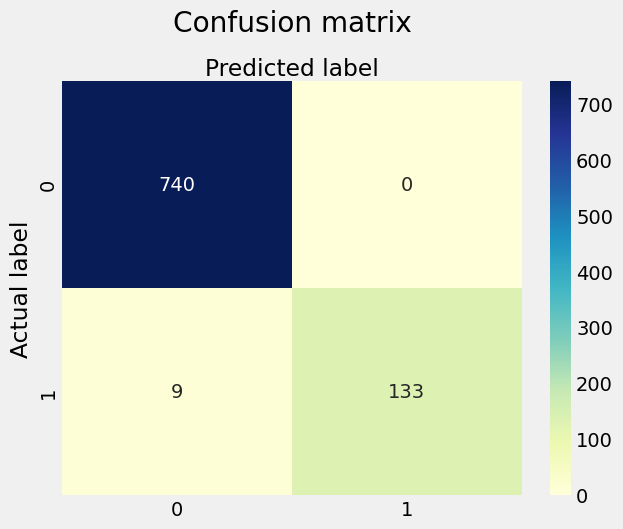

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_rf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
evaluate(rf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2959    0]
 [   0  569]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
              0.0    1.0  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    2959.0  569.0       1.0     3528.0        3528.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[740   0]
 [  9 133]]
ACCURACY SCORE:
0.9898
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.987984    1.000000  0.989796    0.993992      0.989919
recall       1.000000    0.936620  0.989796    0.968310      0.989796
f1-score     0.993956    0.967273  0.989796    0.980614      0.989660
support    740.000000  142.000000  0.989796  882.000000    882.000000


In [ ]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf.predict(X_test)),
    }

Text(0.5, 1.0, 'Feature Importance according to Random Forest')

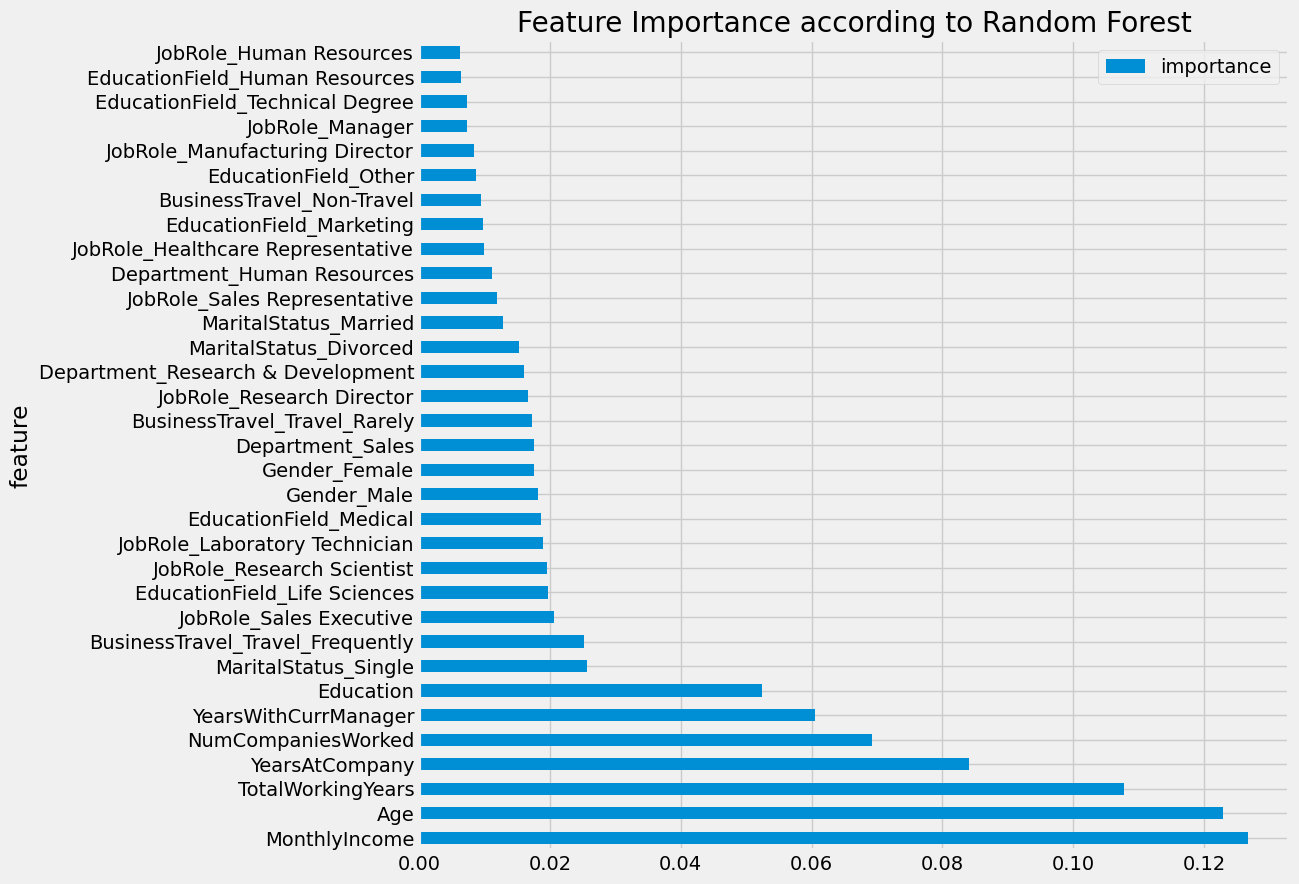

In [ ]:
X = df_dummies.drop('Attrition_encoded', axis=1)
df = feature_imp(X, rf)[:40]

df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')

# XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

xgb_pre=xgb_clf.predict(X_test[predictors])

In [ ]:
print(confusion_matrix(y_test,xgb_pre))

[[737   3]
 [ 12 130]]


In [ ]:
print(classification_report(y_test,xgb_pre))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       740
         1.0       0.98      0.92      0.95       142

    accuracy                           0.98       882
   macro avg       0.98      0.96      0.97       882
weighted avg       0.98      0.98      0.98       882



In [ ]:
cnf_matrix_xg = metrics.confusion_matrix(y_test, xgb_pre)
cnf_matrix_xg

print(classification_report(y_test,xgb_pre))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       740
         1.0       0.98      0.92      0.95       142

    accuracy                           0.98       882
   macro avg       0.98      0.96      0.97       882
weighted avg       0.98      0.98      0.98       882



Text(0.5, 427.9555555555555, 'Predicted label')

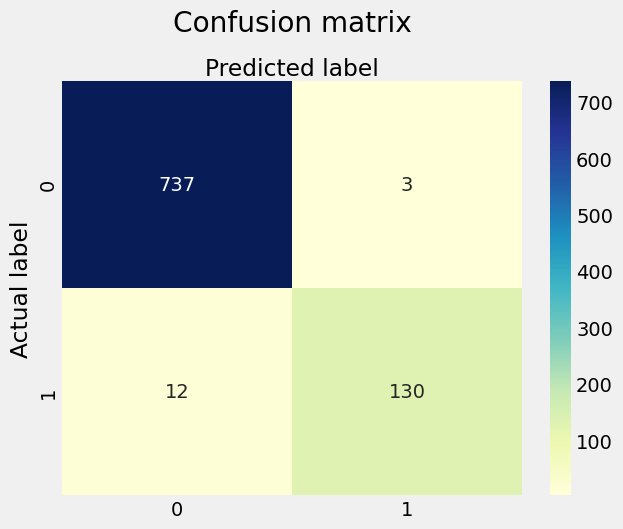

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_xg), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2959    0]
 [   1  568]]
ACCURACY SCORE:
0.9997
CLASSIFICATION REPORT:
                   0.0         1.0  accuracy    macro avg  weighted avg
precision     0.999662    1.000000  0.999717     0.999831      0.999717
recall        1.000000    0.998243  0.999717     0.999121      0.999717
f1-score      0.999831    0.999120  0.999717     0.999476      0.999716
support    2959.000000  569.000000  0.999717  3528.000000   3528.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[737   3]
 [ 12 130]]
ACCURACY SCORE:
0.9830
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.983979    0.977444  0.982993    0.980711      0.982927
recall       0.995946    0.915493  0.982993    0.955719      0.982993
f1-score     0.989926    0.945455  0.982993    0.967690      0.982766
support    740.000000  142.000000  0.982993  882.000000    882.000000


In [ ]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

Text(0.5, 1.0, 'Feature Importance according to XGBoost')

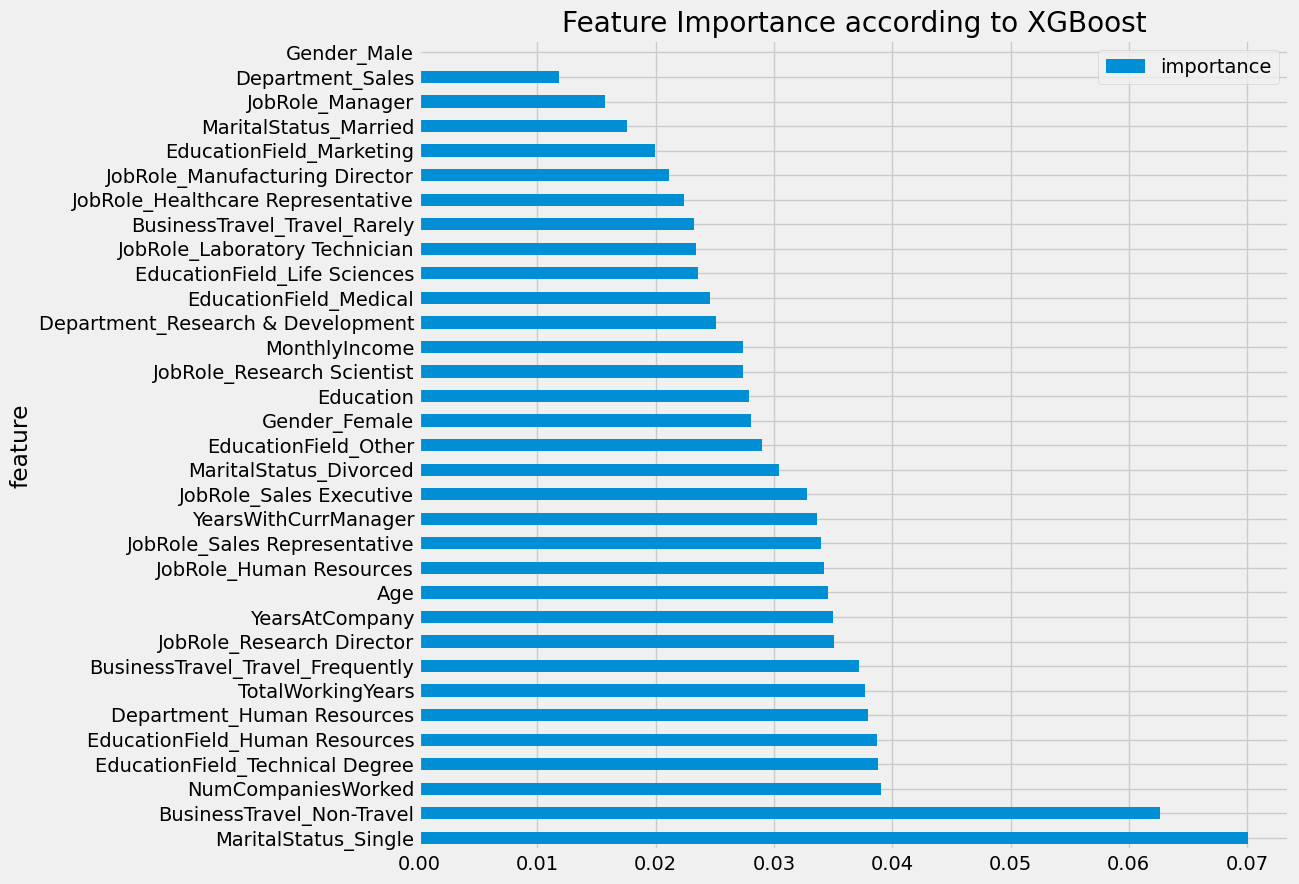

In [ ]:
X = df_dummies.drop('Attrition_encoded', axis=1)
df = feature_imp(X, xgb_clf)[:34]

df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to XGBoost')

# Comparing models

In [ ]:
ml_models = {
    'Random Forest': rf,
    'XGBoost': xgb_clf,
    'Logistic Regression': lr_clf,
    'Decision Tree': dt_model,
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.968
XGBOOST                        roc_auc_score: 0.956
LOGISTIC REGRESSION            roc_auc_score: 0.530
DECISION TREE                  roc_auc_score: 0.964


Text(0.5, 1.0, 'Models Comparison')

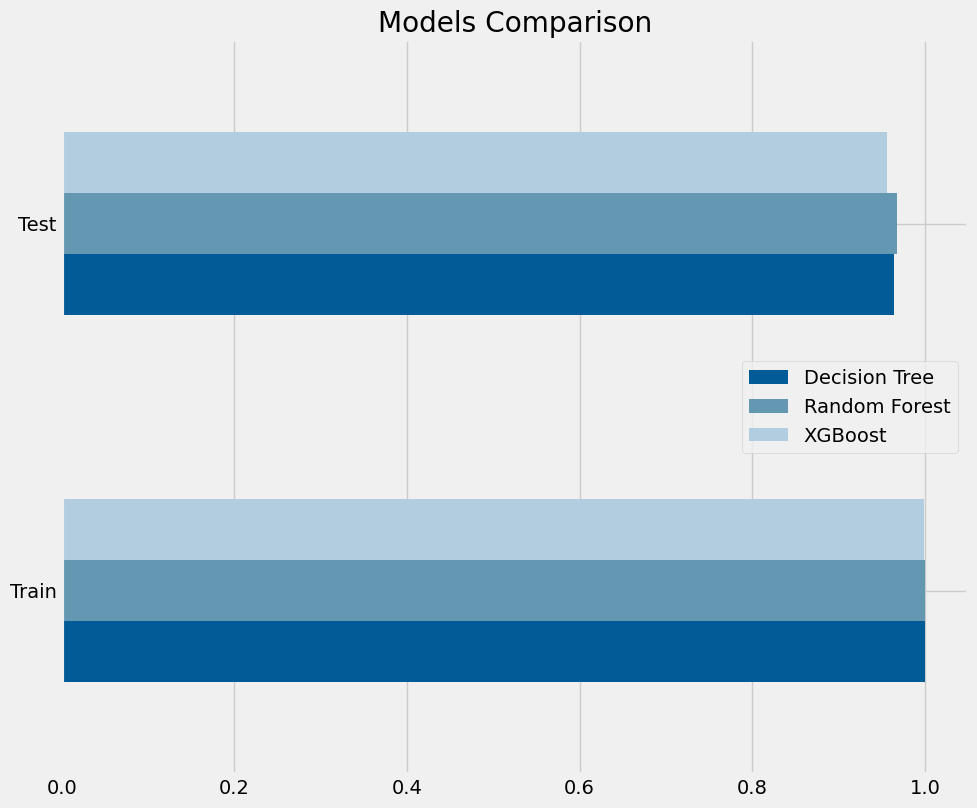

In [ ]:
scores_df = pd.DataFrame(scores_dict)

colors = ['#005b96', '#6497b1', '#b3cde0']
scores_df.plot(kind='barh', figsize=(10, 8), color=colors)
plt.tight_layout()
plt.title('Models Comparison')